In [2]:
# coding: utf-8    #  par défaut l'encoding est en utf-8 pour python 3

# Import des librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pylab
import re
import time
from sklearn import decomposition
from sklearn import preprocessing
from math import *
from datetime import date
import time
from statistics import mean


In [3]:
# Changer la taille de police par défaut
plt.rcParams.update({'font.size': 15})

pd.set_option('display.max_row', 500)
pd.set_option('display.max_column', 400)
pd.set_option('display.column_space', 200)
pd.set_option('display.width', 10000)   # pas encore essayé


In [4]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 50


<IPython.core.display.Javascript object>

## OBJECTIFS

In [ ]:
Segmenter les clients d'une plateforme e-commerce, pour l'utiliser au quotidien pour les campagnes de communication.

# Chargement des données

In [4]:
# order_reviews = pd.read_csv(PATH+'olist_order_reviews_dataset.csv')
# translation = pd.read_csv(PATH+'product_category_name_translation.csv')

sellers = pd.read_csv("sellers.csv")
customers = pd.read_csv("customers.csv")
orders = pd.read_csv("orders.csv")
items = pd.read_csv("order_items.csv")
products = pd.read_csv("products.csv")
category = pd.read_csv("product_category_name_translation.csv")
payments = pd.read_csv("order_payments.csv")
geolocalisation = pd.read_csv("geolocation.csv")


# Description des données

In [5]:
noms_df = ['sellers',
           'customers',
           'orders',
           'items',
           'products',
           'category',
           'payments',
           'geolocalisation']

liste_df = [sellers,
            customers,
            orders,
            items,
            products,
            category,
            payments,
            geolocalisation]


In [8]:
i = 0
for df in liste_df:
    print("************************************")
    print("**** Nom du fichier: ", noms_df[i])
    print("************************************")
    i = i + 1
    print("Variables    : ", df.columns)
    print("Nb variables : ", df.shape[1])
    print("Population   : ", df.shape[0])
    print("Doublons     : ", df.duplicated().sum())
    print("Valeurs vides: ", df.isna().sum().sum() / df.shape[0]/df.shape[1], 'NaN\n')
    

************************************
**** Nom du fichier:  sellers
************************************
Variables    :  Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')
Nb variables :  4
Population   :  3095
Doublons     :  0
Valeurs vides:  0.0 NaN

************************************
**** Nom du fichier:  customers
************************************
Variables    :  Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state'], dtype='object')
Nb variables :  5
Population   :  99441
Doublons     :  0
Valeurs vides:  0.0 NaN

************************************
**** Nom du fichier:  orders
************************************
Variables    :  Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'], dtype='object')
Nb variables :  8
Population   :  99441
Do

## Visualisation rapide des données

### Sellers

In [59]:
sellers = pd.read_csv("sellers.csv")
sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


### customers

In [60]:
customers = pd.read_csv("customers.csv")
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


### orders

In [80]:
orders = pd.read_csv("orders.csv")
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


### items

In [62]:
items = pd.read_csv("order_items.csv")
items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


### products

In [63]:
products = pd.read_csv("products.csv")
products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


### category

In [64]:
category = pd.read_csv("product_category_name_translation.csv")
category.head(3)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


### payments

In [65]:
payments = pd.read_csv("order_payments.csv")
payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


### Geolocalisation

In [66]:
geolocalisation = pd.read_csv("geolocation.csv")
geolocalisation.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


## Préselection des caractéristiques

### Geolocalisation

In [4]:
geolocalisation = pd.read_csv("geolocation.csv")
geolocalisation[geolocalisation['geolocation_zip_code_prefix'] == 1037]

print("Nombre de villes : ",len(geolocalisation['geolocation_city'].unique()))
print("Nombre d'états   : ",len(geolocalisation['geolocation_state'].unique()))
geolocalisation.head(10)

# A RETENIR :   aucune caractéristique


Nombre de villes :  8011
Nombre d'états   :  27


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


Beaucoup de doublons de 'geolocation_zip_code_prefix' qui référence des coordonnées géographiques différentes.

### Clients

In [7]:
customers = pd.read_csv("customers.csv")
print("Doublons customer_id        = ", len(customers[customers.duplicated(subset = ['customer_id'])]))
print("Doublons customer_unique_id = ", len(customers[customers.duplicated(subset = ['customer_unique_id'])]))

print("\nNbre customer_id        = ", len(customers.customer_id.unique()))
print("Nbre customer_unique_id = ", len(customers.customer_unique_id.unique()))

# RETENIR :   customer_id , customer_unique_id

customers = customers.drop(['customer_zip_code_prefix', 'customer_city', 'customer_state'], 1)
customers.head(2)

Doublons customer_id        =  0
Doublons customer_unique_id =  3345

Nbre customer_id        =  99441
Nbre customer_unique_id =  96096


,customer_id,customer_unique_id
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3


Remarque  :  len(customers_id) > len(customer_unique_id) ,  pourquoi ?
Hypothèse :  Certains clients se sont enregistrés plus d'une fois, mais le système les détecte comme client identique.
             Si c'est le cas 'customer_unique_id' doit remplacer 'customers_id'.
             

### Commandes

In [8]:
orders = pd.read_csv("orders.csv")
orders = pd.merge(orders, customers, on='customer_id')    # merge pour emplacer 'customer_id' par 'customer_unique_id'
orders.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff


In [9]:
# Nombre de commandes :
print("\nNombre de commandes = ", len(orders.order_id.unique()))


Nombre de commandes =  99441


In [10]:
# Données manquantes :
print(orders.order_approved_at.isna().sum())
print(orders.order_delivered_carrier_date.isna().sum())
print(orders.order_delivered_customer_date.isna().sum())

160
1783
2965


In [11]:
# Status commandes :      delivered , invoiced , shipped , processing    , unavailable  , canceled , created , approved
#                         livré       facturé    expédié   en traitement   indisponible   annulé     créé      approuvé
print("Statut des commandes :\n", orders['order_status'].unique())

Statut des commandes :
 ['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']


In [12]:
print("La majorité des commandes a été livrée :")
orders['order_status'].value_counts()

La majorité des commandes a été livrée :


delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [13]:
# A RETENIR :   order_id , customer_id , order_approved_at

# Supression des commandes non valides :
orders = orders[~orders['order_status'].isin(['unavailable','canceled'])]
print("Après suppression des commandes non valides : ", orders.shape[0])

# Nettoyage colonnes
orders = orders.drop(['customer_id','order_status','order_purchase_timestamp','order_delivered_carrier_date',
                      'order_delivered_customer_date','order_estimated_delivery_date'], 1)

# suppression des commandes avec NaN localisés sur la colonne 'order_approved_at' :
orders = orders.dropna(how = 'any')
print("Après suppression des commandes sans 'date' : ", orders.shape[0])

# Liste des commandes valides
l_validated_orders = orders['order_id'].unique().tolist()

# Renommage colonnes
orders.columns = ['order_id', 'date', 'customer_id']

orders.head(3)


Après suppression des commandes non valides :  98207
Après suppression des commandes sans 'date' :  98188


,order_id,date,customer_id
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:55:23,3a653a41f6f9fc3d2a113cf8398680e8


In [14]:
# Formatage de la date :

import datetime
from datetime import timedelta

orders['date'] = pd.to_datetime(orders['date'])   # object >> datetime64

debut_periode = orders['date'].min()   # commande la plus ancienne :  2016-09-15 12:16:38
fin_periode   = orders['date'].max()   # commande la plus récente  :  2018-09-03 17:40:06

orders['date'] = orders['date'].dt.date   # enlève les heures, minutes, secondes

# orders['date'] = pd.to_datetime(orders['date'])   # object >> datetime64

print("Commande la plus récente  :", fin_periode)
print("Commande la plus ancienne :", debut_periode)


Commande la plus récente  : 2018-09-03 17:40:06
Commande la plus ancienne : 2016-09-15 12:16:38


In [15]:
print("Doublons de 'customer_id' = ", len(orders[orders.duplicated(subset = ['customer_id'])]))

# Liste des clients ayant commandé plus d'une fois :
l_customer_multip = orders[orders.duplicated(subset = ['customer_id'])]['customer_id'].unique()

print("Nombre de clients multi-commandes = ", len(l_customer_multip))


Doublons de 'customer_id' =  3215
Nombre de clients multi-commandes =  2886


In [28]:
# Recherche du nombre maximal de commandes par client

l_customer_multip   # Liste des clients ayant commandé plusieurs fois

max_orders_customer = 0

for customer in l_customer_multip:
    nbOrders = orders[orders['customer_id'] == customer]['customer_id'].value_counts()[0]   # nombre de commandes pour UN client
    if(nbOrders > max_orders_customer):
        max_orders_customer = nbOrders
print("Max de commandes pour UN client =", max_orders_customer)


Max de commandes pour UN client = 16


In [16]:
# Création du dataframe 'customer_date' pour conserver la date de dernière commande de chaque client (-> pour la récence) :

customer_date = orders.sort_values(['customer_id','date'], ascending = False)
customer_date.drop_duplicates(subset ="customer_id", keep = 'first', inplace=True)   # On ne garde que la date la plus récente
customer_date = customer_date.drop(['order_id'], 1)
print("customer_date :", customer_date.shape)
customer_date.head(3)


customer_date : (94973, 2)


,date,customer_id
70017,2017-05-03,ffffd2657e2aad2907e67c3e9daecbeb
96853,2018-05-02,ffff5962728ec6157033ef9805bacc48
43943,2017-02-07,ffff371b4d645b6ecea244b27531430a


### Saisie de la   Date de référence

In [17]:
# Le code en commentaire permettra de saisir une date de référence pour une autre version de ce projet.
#
# Pour l'instant cette date ('date_ref') est fixée arbitrairement au  5 Septembre 2018.

import datetime

date_ref = datetime.date(2018, 9, 5)

# annee = input("Entrez l'année: "); annee = int(annee)
# mois = input("Entrez le mois: ");  mois = int(mois)
# jour = input("Entrez le jour: ");  jour = int(jour)
 
# date_ref = datetime.datetime(annee, mois, jour)
# print(date_ref)

# # Contrôle la date saisie doit être plus récente que 'fin_periode':
# if (date_ref > fin_periode) == False:
#     print("\nLa date saisie doit être supérieure au 2018-09-03  ! \n")



In [18]:
# Calcul de la Récence

customer_date['date'] = date_ref - customer_date['date']    # calcul récence
customer_date.columns = ['recence', 'customer_id']          # Renommage colonnes

customer_date['recence'] = customer_date['recence'].dt.days.astype('int16')
customer_date.head(3)


,recence,customer_id
70017,490,ffffd2657e2aad2907e67c3e9daecbeb
96853,126,ffff5962728ec6157033ef9805bacc48
43943,575,ffff371b4d645b6ecea244b27531430a


### Lignes de commande

In [23]:
items = pd.read_csv("order_items.csv")
print(items.shape)

# Commandes multi-produits :
print("Nombre de doublons de 'order_id'= ", len(items[items.duplicated(subset = ['order_id'])]))

# Affichage des lignes qui ont plusieurs fois le meme order_id :
l_order_id = items[items.duplicated(subset = ['order_id'])].order_id
items[items['order_id'].isin(l_order_id)].head(5)


(112650, 7)
Nombre de doublons de 'order_id'=  13984


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10


In [24]:
# Nombre max de Lignes de commande / commande :
items['order_item_id'].unique()   # [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

In [29]:
items.loc[items['order_item_id'] == 5]
items.loc[items['order_id'] == '0148d3df00cebda592d4e5f966e300cc']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
558,0148d3df00cebda592d4e5f966e300cc,1,ed08ea04c92f5f434c2362f7310fb328,0adac9fbd9a2b63cccaac4f8756c1ca8,2017-08-24 19:24:32,5.53,11.85
559,0148d3df00cebda592d4e5f966e300cc,2,ed08ea04c92f5f434c2362f7310fb328,0adac9fbd9a2b63cccaac4f8756c1ca8,2017-08-24 19:24:32,5.53,11.85
560,0148d3df00cebda592d4e5f966e300cc,3,ed08ea04c92f5f434c2362f7310fb328,0adac9fbd9a2b63cccaac4f8756c1ca8,2017-08-24 19:24:32,5.53,11.85
561,0148d3df00cebda592d4e5f966e300cc,4,ed08ea04c92f5f434c2362f7310fb328,0adac9fbd9a2b63cccaac4f8756c1ca8,2017-08-24 19:24:32,5.53,11.85
562,0148d3df00cebda592d4e5f966e300cc,5,ed08ea04c92f5f434c2362f7310fb328,0adac9fbd9a2b63cccaac4f8756c1ca8,2017-08-24 19:24:32,5.53,11.85


In [30]:
# A RETENIR :   order_id , product_id , price , freight_value

# lignes de commandes non valides :
nbItems = len(items[~items['order_id'].isin(l_validated_orders)])
print("Nombre de lignes de commandes non valides :", nbItems)

# Suprimmer les lignes de commandes non valides
items = items[items['order_id'].isin(l_validated_orders)]

#  Contrôle de la supression
nbItems = len(items[~items['order_id'].isin(l_validated_orders)])
print("Nombre de lignes de commandes non valides :", nbItems)

# Commandes multi-produits après la supression :
print("Nombre de doublons de 'order_id' après la suppression = ", len(items[items.duplicated(subset = ['order_id'])]))

items = items.drop(['shipping_limit_date','seller_id','order_item_id'], 1)

# Renommage colonnes
items.columns = ['order_id', 'product_id', 'price', 'freight']

print("après nettoyage :", items.shape)
items.head(5)


Nombre de lignes de commandes non valides : 564
Nombre de lignes de commandes non valides : 0
Nombre de doublons de 'order_id' après la suppression =  13901
après nettoyage : (112086, 4)


,order_id,product_id,price,freight
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14


### Ventes par Mois

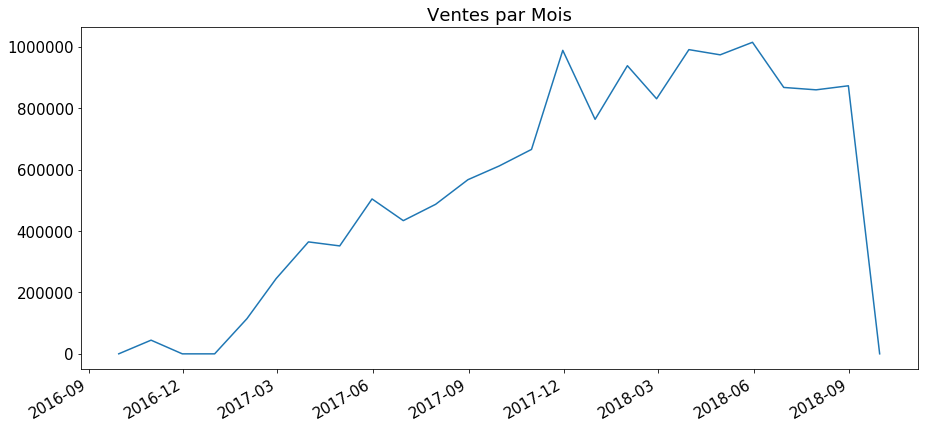

In [31]:
import matplotlib.dates as mdates

df2 = pd.merge(orders, items, on="order_id", how="right")
df2 = df2[["order_id", "date", "price"]]
df2['datetime'] = pd.to_datetime(df2['date'])
value_month = df2[['datetime', 'price']].copy()
value_month.set_index('datetime', inplace=True)
value_month = value_month.groupby(pd.Grouper(freq="M"))['price'].sum()

fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(value_month.index, value_month.values)
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m')
ax.set_title('Ventes par Mois')
fig.savefig("ventes_mois")
plt.show()


### Nombre de commandes par mois

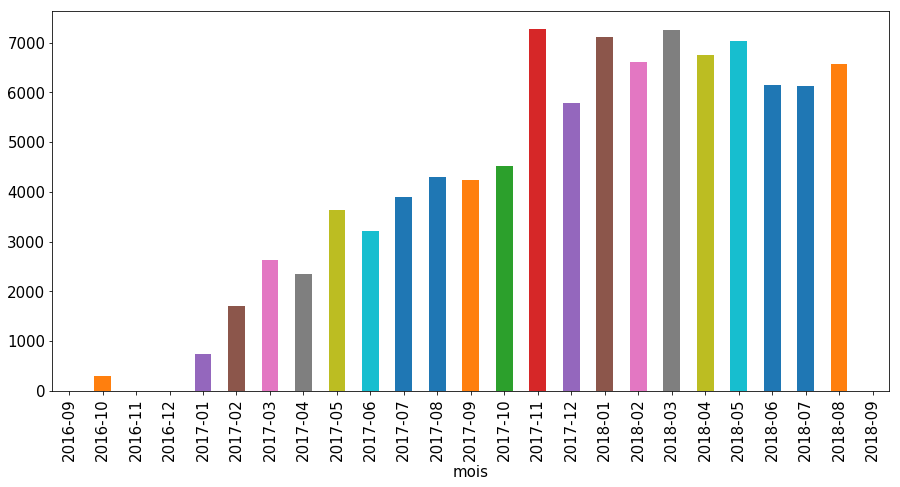

In [47]:
df2 = orders.copy()
df2 = df2[["order_id", "date"]]
df2['datetime'] = pd.to_datetime(df2['date'])
value_month = df2[['datetime', 'order_id']].copy()
value_month.set_index('datetime', inplace=True)
value_month = value_month.groupby(pd.Grouper(freq="M"))['order_id'].count()

x=pd.DataFrame(data=value_month)
x['date'] = value_month.index
x['mois'] = x['date'].dt.to_period('M')
ax = x.plot.bar(x='mois', y='order_id', legend=False, figsize=(15, 7))


### Produits

In [32]:
products = pd.read_csv("products.csv")
print(products.shape)
print("Nombre de doublons = ", len(products[products.duplicated(subset = ['product_id'])]))   # Clé

(32951, 9)
Nombre de doublons =  0


In [33]:
# Données manquantes :
print(products.product_weight_g.isna().sum())
print(products.product_length_cm.isna().sum())
print(products.product_height_cm.isna().sum())
print(products.product_width_cm.isna().sum())

2
2
2
2


In [50]:
print("Nombre de catégories de produit =",len(products['product_category_name'].unique()))


Nombre de catégories de produit = 74


In [34]:
# A RETENIR :   product_id , product_weight_g , product_length_cm , product_height_cm , product_width_cm

products = products.drop(['product_category_name','product_name_lenght','product_description_lenght','product_photos_qty'], 1)

# Renommage colonnes
products.columns = ['product_id','weight','length','height','width']

# Ajout de la colonne 'volume' exprimé en cm3 :
products['volume']= products['length'] * products['height'] * products['width']

print("Avant suppression des NaN : ", products.shape[0])
products = products.dropna(how = 'any')                     
# 2 produits n'ont pas de 'product_weight_g', 'product_length_cm' , 'product_height_cm' , 'product_width_cm'
print("Après suppression des NaN : ", products.shape[0])

products.head(3)


Avant suppression des NaN :  32951
Après suppression des NaN :  32949


,product_id,weight,length,height,width,volume
0,1e9e8ef04dbcff4541ed26657ea517e5,225.0,16.0,10.0,14.0,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,1000.0,30.0,18.0,20.0,10800.0
2,96bd76ec8810374ed1b65e291975717f,154.0,18.0,9.0,15.0,2430.0


### Catégorie Produit

In [35]:
category = pd.read_csv("product_category_name_translation.csv")
print(category.shape)
category = category.head(3)
category

# A RETENIR :   aucune caractéristique :   cette table ne fait que donner la version english de la catégorie de produit

(71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


### Paiements

In [36]:
payments = pd.read_csv("order_payments.csv")
print(payments.shape)

(103886, 5)


In [ ]:
payments

In [54]:
print("Types de paiement : ", payments['payment_type'].unique())
print(payments['payment_sequential'].unique())
print(payments['payment_installments'].unique())

# 'payment_sequential'   :  numero d'ordre pour les paiements etalés
# 'payment installments' :  acomptes de paiement

Types de paiement :  ['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']
[ 1  2  4  5  3  8  6  7 10 11 17 19 27 12  9 15 13 14 16 25 22 26 29 28
 18 21 24 23 20]
[ 8  1  2  3  6  5  4 10  7 12  9 13 15 24 11 18 14 20 21 17 22  0 16 23]


credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64


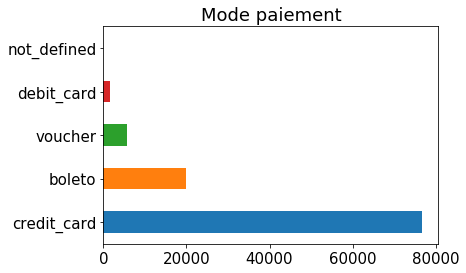

In [55]:
pref = payments['payment_type'].value_counts()
print(pref)

ax = pref.plot(kind='barh', title='Mode paiement')
ax

# boleto          : billet
# voucher         : équivalent du chèque = Bon émis par certaines agences et donnant droit à des services.
# carte de débit  : carte bancaire classique autorisant à la fois les retraits d’espèces et les achats
# carte de crédit : liée à un crédit renouvelable. Réglement 'comptant' ou 'à crédit'.
#                   'à crédit', le paiement aura lieu en plusieurs fois.

In [56]:
print("Suppression des paiements indéfinis")
payments = payments[~payments['payment_type'].isin(['not_defined'])]

print("Supression des paiements liés aux commandes invalides")
payments = payments[payments['order_id'].isin(l_validated_orders)]

Suppression des paiements indéfinis
Supression des paiements liés aux commandes invalides


In [48]:
payments.loc[payments['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352']   # commande avec 29 paiements, c'est le max
# payments.loc[payments['order_id'] == 'fedcd9f7ccdc8cba3a18defedd1a5547']   # commande avec 19 paiements
# payments[payments['order_id'] == '816ccd9d21435796e8ffa9802b2a782f']       # commande avec 5 paiements
# payments[payments['order_id'] == 'a079628ac8002126e75f86b0f87332e4']       # commande avec 2 paiements
# payments[payments['order_id'] == '744bade1fcf9ff3f31d860ace076d422']       # commande avec 1 paiement
# payments[payments['order_id'] == 'b81ef226f3fe1789b1e8b2acac839d17']       # commande avec 1 paiement


,order_id,payment_sequential,payment_type,payment_installments,payment_value
4885,fa65dad1b0e818e3ccc5cb0e39231352,27,voucher,1,66.02
9985,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,29.16
14321,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71
17274,fa65dad1b0e818e3ccc5cb0e39231352,9,voucher,1,1.08
19565,fa65dad1b0e818e3ccc5cb0e39231352,10,voucher,1,12.86
23074,fa65dad1b0e818e3ccc5cb0e39231352,2,voucher,1,8.51
24879,fa65dad1b0e818e3ccc5cb0e39231352,25,voucher,1,3.68
28330,fa65dad1b0e818e3ccc5cb0e39231352,5,voucher,1,0.66
29648,fa65dad1b0e818e3ccc5cb0e39231352,6,voucher,1,5.02
32519,fa65dad1b0e818e3ccc5cb0e39231352,11,voucher,1,4.03


In [57]:
print("Shape :", payments.shape, "\n")

# Liste des commandes multi-paiements :
print("Nombre de commandes total              = ", len(payments['order_id'].unique() ))
l_order_multip = payments[payments.duplicated(subset = ['order_id'])]['order_id'].unique()
print("Nombre de commandes en multi-paiements = ", len(l_order_multip))
# payments = payments[payments['order_id'].isin(l_order_multip)]


Shape : (102554, 5) 

Nombre de commandes total              =  98187
Nombre de commandes en multi-paiements =  2920


In [78]:
# Exploration des Commandes multi-paiements :

max_type_payments = 0
list_type_payments = []

for id in l_order_multip:
    
    un_order = payments[payments['order_id'] == id]
    set_payment  = set(un_order['payment_type'].tolist())   # set enleve les doublons
    if set_payment not in list_type_payments:
        list_type_payments.append(set_payment)
    nbTypePayments = len(set_payment)
    if(nbTypePayments > max_type_payments):
        max_type_payments = nbTypePayments
    #print(set_payment," types de paiement multiple pour la commande :", id)

print("Liste des Combinaisons de type de paiements :  ", list_type_payments)        
print("\nNombre max de type de paiement pour une commande = ", max_type_payments)

# Il n'y a jamais plus de 2 'payment_type' pour les commandes à paiements multiples.
# Pour ces paiements multiples, on conservera le 1er type de paiement selon l'ordre ascendant de 'payment_sequential'.
# Le 2eme type de paiement est souvent 'voucher'.


Liste des Combinaisons de type de paiements :   [{'voucher', 'credit_card'}, {'voucher'}, {'credit_card'}, {'credit_card', 'debit_card'}, {'debit_card'}]

Nombre max de type de paiement pour une commande =  2


In [58]:
# Désignation du type de paiement ('payment_type') à chaque commande :
Paiement_first = payments.sort_values(['order_id', 'payment_sequential'], ascending = True)   # 1,2,3,4,5...
Paiement_first.drop_duplicates(subset ="order_id", keep = 'first', inplace=True)
Paiement_first = Paiement_first.drop(['payment_sequential','payment_installments','payment_value'], 1)

# Attribution du nombre de paiements ('payment_sequential')  à chaque commande :
Paiement_last = payments.sort_values(['order_id', 'payment_sequential'], ascending = True)
Paiement_last.drop_duplicates(subset ="order_id", keep = 'last', inplace=True)
Paiement_last = Paiement_last.drop(['payment_type','payment_installments','payment_value'], 1)
Paiement_last.columns = ['order_id', 'nb_payments']

payments = pd.merge(Paiement_first, Paiement_last, on='order_id')
print(payments['nb_payments'].unique())
print(payments.head(6))


[ 1  2  6  3  7  4  5 11 12 10 15  8  9 22 14 13 21 26 19 29]
                           order_id payment_type  nb_payments
0  00010242fe8c5a6d1ba2dd792cb16214  credit_card            1
1  00018f77f2f0320c557190d7a144bdd3  credit_card            1
2  000229ec398224ef6ca0657da4fc703e  credit_card            1
3  00024acbcdf0a6daa1e931b038114c75  credit_card            1
4  00042b26cf59d7ce69dfabb4e55b4fd9  credit_card            1
5  00048cc3ae777c65dbb7d2a0634bc1ea       boleto            1


credit_card    2494
voucher         424
debit_card        2
Name: payment_type, dtype: int64


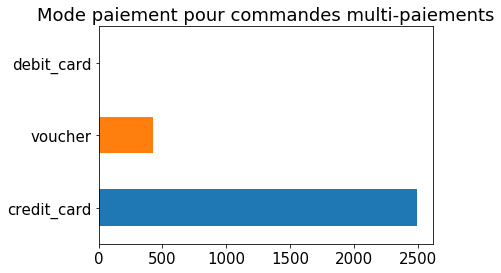

In [59]:
# Répartition des types de paiements pour les commandes multi-paiements
pref = payments[payments['order_id'].isin(l_order_multip)]['payment_type'].value_counts(); print(pref)
ax = pref.plot(kind='barh', title='Mode paiement pour commandes multi-paiements')
ax

### Encodage de la variable 'payments.payment_type'

In [60]:
from sklearn.preprocessing import OneHotEncoder

# 1. Encodage
X = payments[['payment_type']]   # Choix des variables à encoder
                                          
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X).toarray()
print("X_encoded.shape :", X_encoded.shape)

# 2. Reconstitution du dataframe 'products'
col = encoder.get_feature_names(['payment_type'])   # Récupérer les colonnes crées par OneHotEncoder

# Convertir le 'numpy.ndarray' en un dataframe :
df_X = pd.DataFrame(data=X_encoded, index=payments.index, columns=col)
df_X.head(50)

# Supprimer les colonnes traitées par OneHotEncoder ...
payments_enc = payments.drop(['payment_type'], 1) 

# ... et les remplacer par leurs équivalents OneHotEncoder :
payments = payments_enc.join(df_X)
print(payments.shape)
payments.head(3)

X_encoded.shape : (98187, 4)
(98187, 6)


,order_id,nb_payments,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,00010242fe8c5a6d1ba2dd792cb16214,1,0.0,1.0,0.0,0.0
1,00018f77f2f0320c557190d7a144bdd3,1,0.0,1.0,0.0,0.0
2,000229ec398224ef6ca0657da4fc703e,1,0.0,1.0,0.0,0.0


## Formation du dataset

In [73]:
#  Table maitresse :   'items' ['order_id', 'product_id', 'price', 'freight_value']


#  Aggrégation des caractéristiques des Produits :  ['weight', 'length', 'height', 'width']

print("Taille Avant :", len(items))
data_rfm = pd.merge(items, products, on='product_id')
print("Taille Après :", len(data_rfm))

data_rfm = data_rfm.drop(['product_id'], 1)   # 'product_id' n'est plus utile
data_rfm.head(3)


Taille Avant : 112086
Taille Après : 112068


,order_id,price,freight,weight,length,height,width,volume
0,00010242fe8c5a6d1ba2dd792cb16214,58.9,13.29,650.0,28.0,9.0,14.0,3528.0
1,130898c0987d1801452a8ed92a670612,55.9,17.96,650.0,28.0,9.0,14.0,3528.0
2,532ed5e14e24ae1f0d735b91524b98b9,64.9,18.33,650.0,28.0,9.0,14.0,3528.0


In [74]:
#  Regroupement des lignes de commande par commande

print("Taille Avant :", len(data_rfm))
data_rfm = data_rfm.groupby(['order_id']).sum().reset_index()
print("Taille Après :", len(data_rfm))
data_rfm.head(3)


Taille Avant : 112068
Taille Après : 98169


,order_id,price,freight,weight,length,height,width,volume
0,00010242fe8c5a6d1ba2dd792cb16214,58.9,13.29,650.0,28.0,9.0,14.0,3528.0
1,00018f77f2f0320c557190d7a144bdd3,239.9,19.93,30000.0,50.0,30.0,40.0,60000.0
2,000229ec398224ef6ca0657da4fc703e,199.0,17.87,3050.0,33.0,13.0,33.0,14157.0


In [75]:
#  Aggrégation des caractéristiques des Paiements : 
#
#       ['nb_payments', 'payment_type_boleto', 'payment_type_credit_card', 'payment_type_debit_card', 'payment_type_voucher']

print("Taille Avant :", len(data_rfm))
data_rfm = pd.merge(data_rfm, payments, on='order_id')
print("Taille Après :", len(data_rfm))
data_rfm.head(3)


Taille Avant : 98169
Taille Après : 98168


,order_id,price,freight,weight,length,height,width,volume,nb_payments,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,00010242fe8c5a6d1ba2dd792cb16214,58.9,13.29,650.0,28.0,9.0,14.0,3528.0,1,0.0,1.0,0.0,0.0
1,00018f77f2f0320c557190d7a144bdd3,239.9,19.93,30000.0,50.0,30.0,40.0,60000.0,1,0.0,1.0,0.0,0.0
2,000229ec398224ef6ca0657da4fc703e,199.0,17.87,3050.0,33.0,13.0,33.0,14157.0,1,0.0,1.0,0.0,0.0


In [76]:
# Préparation du Calcul de la Fréquence de commande :  Une commande a une fréquence de 1

data_rfm['frequence'] = 1
data_rfm = pd.merge(data_rfm, orders[['order_id', 'customer_id']])   # pour récupérer 'customer_id'
data_rfm.head(3)


,order_id,price,freight,weight,length,height,width,volume,nb_payments,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,frequence,customer_id
0,00010242fe8c5a6d1ba2dd792cb16214,58.9,13.29,650.0,28.0,9.0,14.0,3528.0,1,0.0,1.0,0.0,0.0,1,871766c5855e863f6eccc05f988b23cb
1,00018f77f2f0320c557190d7a144bdd3,239.9,19.93,30000.0,50.0,30.0,40.0,60000.0,1,0.0,1.0,0.0,0.0,1,eb28e67c4c0b83846050ddfb8a35d051
2,000229ec398224ef6ca0657da4fc703e,199.0,17.87,3050.0,33.0,13.0,33.0,14157.0,1,0.0,1.0,0.0,0.0,1,3818d81c6709e39d06b2738a8d3a2474


In [77]:
# Dataframe sans 'order_id','length','height','width' :

data_rfm = data_rfm[['customer_id','price','freight','weight','volume','nb_payments', 'frequence',
                     'payment_type_boleto', 'payment_type_credit_card','payment_type_debit_card','payment_type_voucher']]
data_rfm.head(3)


,customer_id,price,freight,weight,volume,nb_payments,frequence,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,871766c5855e863f6eccc05f988b23cb,58.9,13.29,650.0,3528.0,1,1,0.0,1.0,0.0,0.0
1,eb28e67c4c0b83846050ddfb8a35d051,239.9,19.93,30000.0,60000.0,1,1,0.0,1.0,0.0,0.0
2,3818d81c6709e39d06b2738a8d3a2474,199.0,17.87,3050.0,14157.0,1,1,0.0,1.0,0.0,0.0


In [78]:
#  Regroupement des commandes par client
#
#  - Moyenne pour les colonnes :  'price' , 'freight' , 'weight' , 'volume' , 'payment_type_xxx'                           
#  - Max     pour les colonnes :  'price'
#  - Min     pour les colonnes :  'price'
#  - Somme   pour les colonnes :  'frequence'

data_rfm = data_rfm.groupby(['customer_id']).aggregate(
    {'customer_id': 'min',
     'price': ['mean', 'min', 'max'],
     'freight': ['mean'], 'weight': ['mean'],
     'volume': ['mean'],
     'nb_payments': ['mean'],
     'frequence': ['sum'],
     'payment_type_boleto': ['mean'], 'payment_type_credit_card': ['mean'],
     'payment_type_debit_card': ['mean'],'payment_type_voucher': ['mean'] })

data_rfm.columns = data_rfm.columns.droplevel(level=[0])

data_rfm.columns = ['customer_id', 'price', 'price_min', 'price_max', 'freight', 'weight', 
                    'volume', 'nb_payments', 'frequence',
                    'payment_boleto', 'payment_credit_card', 'payment_debit_card','payment_voucher']

data_rfm.reset_index(drop = True, inplace = True)
data_rfm.head(3)


,customer_id,price,price_min,price_max,freight,weight,volume,nb_payments,frequence,payment_boleto,payment_credit_card,payment_debit_card,payment_voucher
0,0000366f3b9a7992bf8c76cfdf3221e2,129.9,129.9,129.9,12.00,1500.0,7616.0,1.0,1,0.0,1.0,0.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.9,18.9,18.9,8.29,375.0,5148.0,1.0,1,0.0,1.0,0.0,0.0
2,0000f46a3911fa3c0805444483337064,69.0,69.0,69.0,17.22,1500.0,43750.0,1.0,1,0.0,1.0,0.0,0.0


In [79]:
#  Aggrégation de la 'recence' :

clients = pd.merge(data_rfm, customer_date, on='customer_id')
print("Shape Clients : ", clients.shape)

clients = clients[['customer_id', 'price', 'price_min', 'price_max', 'freight', 'weight', 
                    'volume', 'nb_payments', 'frequence', 'recence',
                    'payment_boleto', 'payment_credit_card', 'payment_debit_card','payment_voucher']]

clients.head(3)


Shape Clients :  (94956, 14)


,customer_id,price,price_min,price_max,freight,weight,volume,nb_payments,frequence,recence,payment_boleto,payment_credit_card,payment_debit_card,payment_voucher
0,0000366f3b9a7992bf8c76cfdf3221e2,129.9,129.9,129.9,12.00,1500.0,7616.0,1.0,1,118,0.0,1.0,0.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.9,18.9,18.9,8.29,375.0,5148.0,1.0,1,121,0.0,1.0,0.0,0.0
2,0000f46a3911fa3c0805444483337064,69.0,69.0,69.0,17.22,1500.0,43750.0,1.0,1,544,0.0,1.0,0.0,0.0


In [80]:
clients['frequence'].unique()

array([ 1,  2,  3,  4,  6,  7,  5,  9, 16], dtype=int64)

## Statistiques descriptives

In [219]:
stat = clients.describe().round(2)
# stat.to_csv("C:/Users/loic/Documents/Formation/Data Scientist/Projet_5/stat.csv", index=False, header=True, sep=';')
stat


Nombre de clients avec freight= 0 : 332
Nombre de clients avec weight=  0 : 6


,price,price_min,price_max,freight,weight,volume,nb_payments,frequence,recence,payment_boleto,payment_credit_card,payment_debit_card,payment_voucher
count,94956.00,94956.00,94956.00,94956.00,94956.00,94956.00,94956.00,94956.00,94956.00,94956.0,94956.00,94956.00,94956.00
mean,137.91,136.58,139.28,22.82,2392.22,17397.24,1.04,1.03,244.74,0.2,0.77,0.02,0.02
std,210.08,209.65,211.67,21.56,4754.25,30290.83,0.37,0.21,152.93,0.4,0.42,0.12,0.12
min,0.85,0.85,0.85,0.00,0.00,168.00,1.00,1.00,2.00,0.0,0.00,0.00,0.00
25%,46.40,45.12,47.00,13.89,300.00,2992.00,1.00,1.00,121.00,0.0,1.00,0.00,0.00
50%,87.20,85.00,89.00,17.25,750.00,7427.00,1.00,1.00,225.00,0.0,1.00,0.00,0.00
75%,149.90,149.90,149.99,24.14,2100.00,19872.00,1.00,1.00,354.00,0.0,1.00,0.00,0.00
max,13440.00,13440.00,13440.00,1794.96,184400.00,1476000.00,29.00,16.00,701.00,1.0,1.00,1.00,1.00


In [220]:
# Médianes :
clients.median().round(2)

# Remarque :   Aucune variable ne semble suivre une distribution normale.
#              Une transformation pour les rendre +ou- normales va être nécessaire
#
# Colonnes avec une forte différence entre la moyenne et la médiane => Asymétrie


price                    87.20
price_min                85.00
price_max                89.00
freight                  17.25
weight                  750.00
volume                 7427.00
nb_payments               1.00
frequence                 1.00
recence                 225.00
payment_boleto            0.00
payment_credit_card       1.00
payment_debit_card        0.00
payment_voucher           0.00
dtype: float64

## Analyse univariée avant traitement des données

In [208]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

def plotDistribGraph(pdf):
    fig, a = plt.subplots(ncols=1, figsize=(16, 5))
    a.set_title("Distributions")
    for col in pdf.columns:
        sns.kdeplot(pdf[col], ax=a)
    plt.show()
 
def plotGraph(pdf, pscaled_df):
    fig, (a, b) = plt.subplots(ncols=2, figsize=(16, 5))
    a.set_title("Avant mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pdf[col], ax=a)
    b.set_title("Apres mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pscaled_df[col], ax=b)
    plt.show()
 
def plotGraphAll(pdf, pscaled1, pscaled2, pscaled3):
    fig, (a, b, c, d) = plt.subplots(ncols=4, figsize=(16, 5))
    a.set_title("Avant mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pdf[col], ax=a)
    b.set_title("RobustScaler")
    for col in pscaled1.columns:
        sns.kdeplot(pscaled1[col], ax=b)
    c.set_title("MinMaxScaler")
    for col in pscaled2.columns:
        sns.kdeplot(pscaled2[col], ax=c)
    d.set_title("StandardScaler")
    for col in pscaled3.columns:
        sns.kdeplot(pscaled3[col], ax=d)
    plt.show()


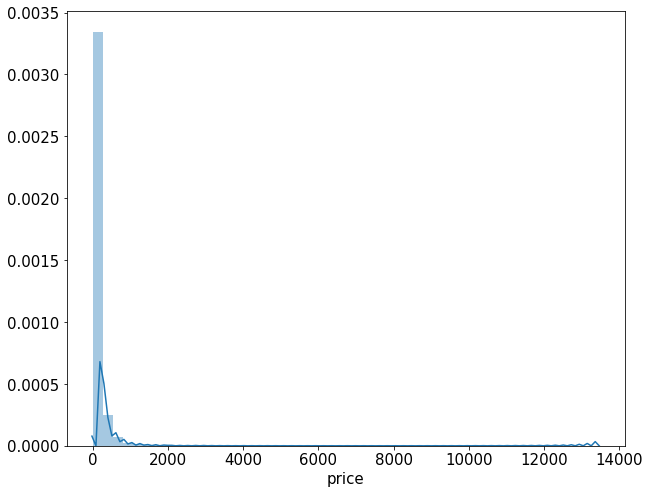

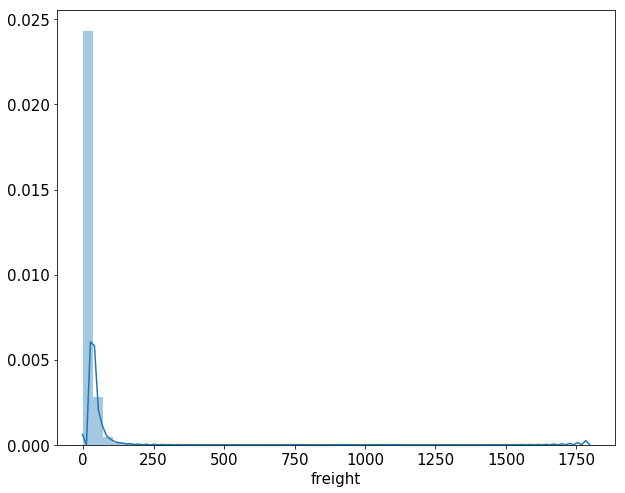

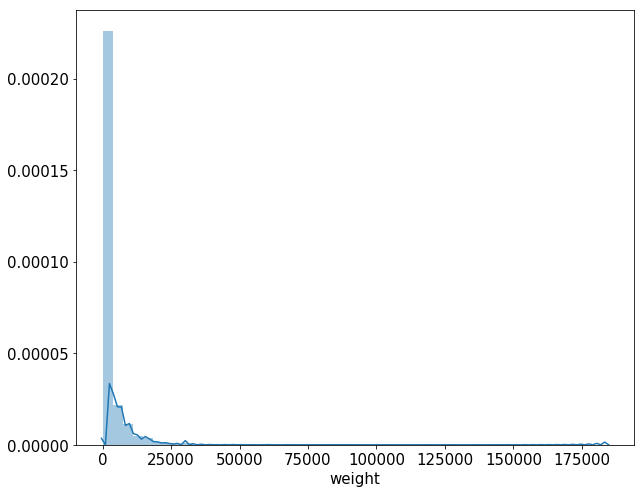

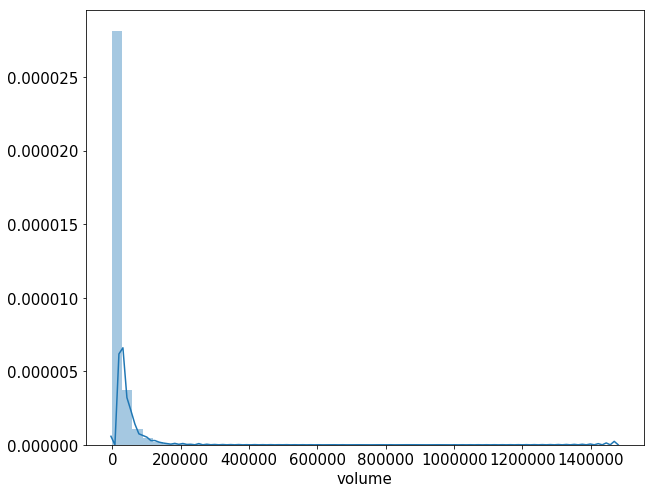

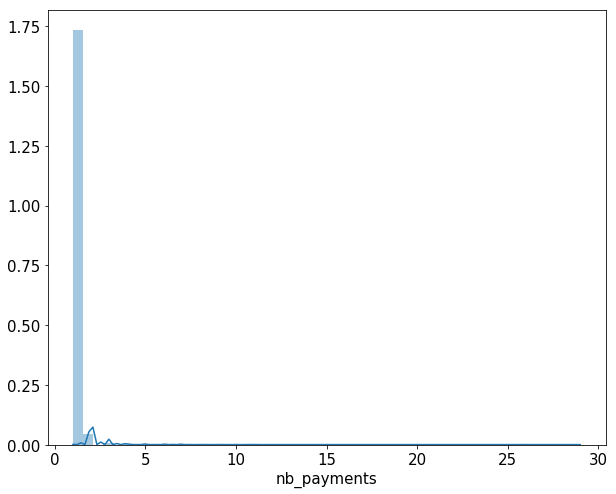

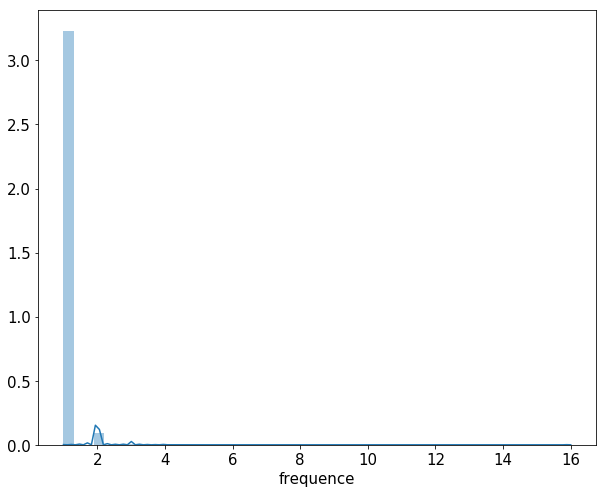

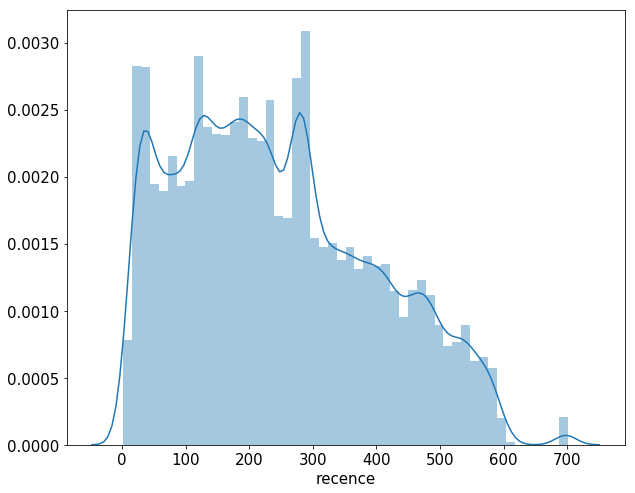

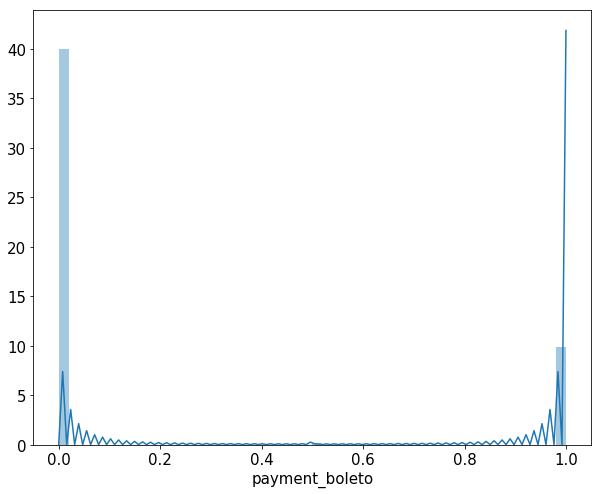

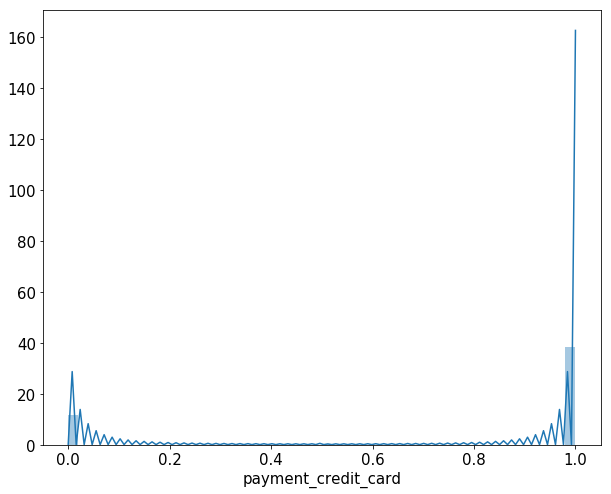

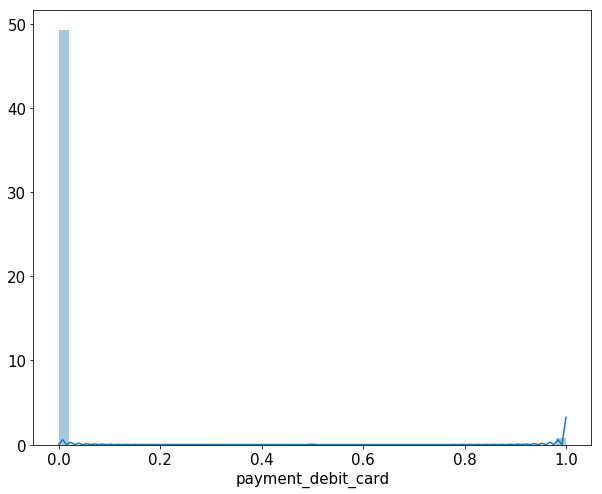

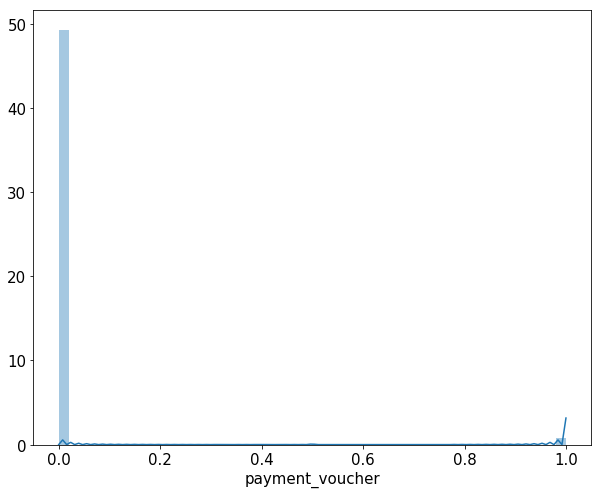

In [221]:
# Histogramme des variables quantitatives :

colonnes =  ['price', 'freight', 'weight', 'volume', 'nb_payments', 'frequence', 'recence',
             'payment_boleto', 'payment_credit_card', 'payment_debit_card', 'payment_voucher']

# Les variables oneHotEncodées restent des variables qualitatives bien qu'elle soient numériques

nb=1
for col in colonnes:    
    fig = plt.figure(figsize = (10, 8))
    sns.distplot(clients[col])
    #plotDistribGraph(clients[[col]])
    nomFig = "dist_{0}.png".format(col)
    plt.savefig(nomFig, dpi=50 )
    nb +=1
  

## Analyse bivariée

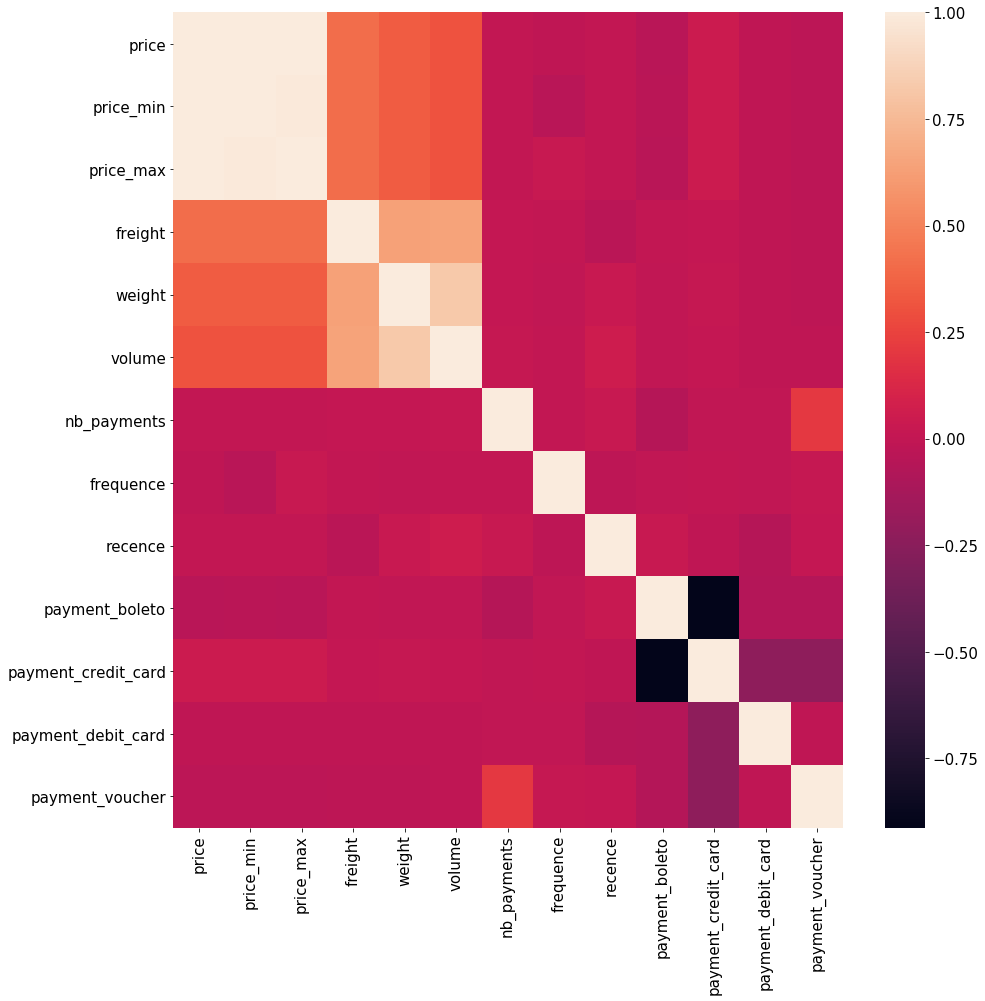

,price,price_min,price_max,freight,weight,volume,nb_payments,frequence,recence,payment_boleto,payment_credit_card,payment_debit_card,payment_voucher
price,1.000000,0.997358,0.997160,0.411876,0.349445,0.312342,0.002029,-0.011364,0.003433,-0.038860,0.048958,-0.010851,-0.030640
price_min,0.997358,1.000000,0.989167,0.409899,0.347660,0.310555,0.001682,-0.045248,0.004445,-0.038635,0.048739,-0.010603,-0.030870
price_max,0.997160,0.989167,1.000000,0.411540,0.349232,0.312350,0.002358,0.026060,0.002226,-0.038875,0.048922,-0.011067,-0.030250
freight,0.411876,0.409899,0.411540,1.000000,0.641001,0.641939,0.007100,0.000885,-0.035070,0.003392,0.006591,-0.012296,-0.021360
weight,0.349445,0.347660,0.349232,0.641001,1.000000,0.824932,0.013502,-0.002361,0.033273,-0.007057,0.016152,-0.015945,-0.016453
volume,0.312342,0.310555,0.312350,0.641939,0.824932,1.000000,0.014499,-0.000741,0.052867,-0.004700,0.012636,-0.016272,-0.011715
nb_payments,0.002029,0.001682,0.002358,0.007100,0.013502,0.014499,1.000000,0.005797,0.023488,-0.059284,-0.002175,-0.003551,0.204810
frequence,-0.011364,-0.045248,0.026060,0.000885,-0.002361,-0.000741,0.005797,1.000000,-0.021920,-0.003674,0.000806,-0.004502,0.013779
recence,0.003433,0.004445,0.002226,-0.035070,0.033273,0.052867,0.023488,-0.021920,1.000000,0.026456,-0.011707,-0.058542,0.013008
payment_boleto,-0.038860,-0.038635,-0.038875,0.003392,-0.007057,-0.004700,-0.059284,-0.003674,0.026456,1.000000,-0.912992,-0.061949,-0.061276


In [258]:
# Matrice de corrélation heatmap sur le dataframe originale (avant le OneHotEncoding)

fig = plt.figure(figsize = (15, 15))
sns.heatmap(clients.corr())   # graphique
plt.savefig( "heat.png", dpi=50 )
plt.show()

clients.corr()                # statistiques


### Sauvegarde avant Transformation des variables

In [81]:
avantTRANS = clients.copy()     # sauvegarde

In [82]:
clients   = avantTRANS.copy()   # restore

## Transformation des variables

In [83]:
# 1. RACINE
col_racine =  ['price', 'price_min', 'price_max', 'freight', 'weight', 'volume', 'nb_payments', 'frequence', 'recence',
              'payment_boleto', 'payment_credit_card', 'payment_debit_card', 'payment_voucher']
for col in col_racine:      
    clients[col] = np.sqrt(clients[col])

    
# 2. STANDARDISATION
col_std =  ['price', 'price_min', 'price_max', 'freight', 'weight', 'volume', 'nb_payments', 'frequence', 'recence',
              'payment_boleto', 'payment_credit_card', 'payment_debit_card', 'payment_voucher']
for col in col_std:      
    clients[col] = (clients[col] - clients[col].mean()) / clients[col].std(ddof = 0)


### Fonctions d'affichage

In [226]:
from matplotlib.collections import LineCollection
import random
from scipy.cluster.hierarchy import dendrogram


def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None, plan=1):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(8,7))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))

            color = ['red','blue','green','red','blue','green','red', 'blue', 'green', 'red', 'blue', 'green',
                     'black', 'orange', 'violet', 'black', 'orange', 'violet']

#             color = ['black','yellowgreen','red','blue','orange','purple','green','cyan','azure','magenta','violet',\
#                      'chartreuse','springgreen','indigo', 'brown','cadetblue','coral','cornflowerblue', 'cornsilk',\
#                      'chocolate','tan','steelblue','turquoise', 'wheat', 'whitesmoke', \
#                      'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', \
#                      'silver', 'skyblue', 'slateblue', 'slategray', 'slategrey', 'springgreen', 'steelblue', 'tan', \
#                      'teal', 'thistle', 'tomato']            # le 'yellowgreen' est plus visible que le 'yellow'
  
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        #plt.text(x, y, labels[i], fontsize='18', ha='center', va='center', rotation=label_rotation, color="steelblue", alpha=0.5)
                        plt.text(x, y, labels[i], fontsize='18', ha='center', va='center', rotation=label_rotation, color=color[i], alpha=0.5)
    
        
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            nomFig = "cercle{0}.png".format(plan)
            plt.savefig(nomFig, dpi=60 )
            plt.show(block=False)


# ----------------------------------------------------------------------------------------------------
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, \
                             illustrative_var=None, grade=None, cluster=None, taille_point=10, plan="0"):
    
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(8,7))
        
            color = ['black','yellowgreen','red','blue','orange','purple','green','cyan','azure','magenta','violet',\
                     'chartreuse','springgreen','indigo', 'brown','cadetblue','coral','cornflowerblue', 'cornsilk',\
                     'chocolate','tan','steelblue','turquoise', 'wheat', 'whitesmoke', \
                     'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', \
                     'silver', 'skyblue', 'slateblue', 'slategray', 'slategrey', 'springgreen', 'steelblue', 'tan', \
                     'teal', 'thistle', 'tomato']            # le 'yellowgreen' est plus visible que le 'yellow'
        
            i=0
            
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha, s=taille_point)
            else:
                illustrative_var = np.array(illustrative_var)
                
                if grade is not None:
                    selected = np.where(illustrative_var == grade)
                    j=random.randint(0, 42)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=grade, c=[color[j]], s=taille_point)
                elif cluster is not None:
                    selected = np.where(illustrative_var == cluster)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=cluster, marker='x', s=taille_point)
                else:
                    for value in np.unique(illustrative_var):
                        selected = np.where(illustrative_var == value)
                        plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value, c=[color[i]], s=taille_point)
                        i+=1
                        #i+=2

            plt.legend(fontsize=20)

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                     #plt.text(x+0.3, y+0.3, labels[i], fontsize='10', ha='center',va='center') 
                     plt.text(x+0.1, y+0.1, labels[i], fontsize='10', ha='center',va='center') 

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            nomFig = "plan_fact{0}.png".format(plan)
            plt.savefig(nomFig, dpi=60 )
            plt.show(block=False)



# ----------------------------------------------------------------------------------------------------
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.figure(figsize=(15,10))   # largeur, hauteur
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.savefig( "eboulis.png", dpi=50 )
    plt.show(block=False)

# ----------------------------------------------------------------------------------------------------
def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.savefig( "dendo.png", dpi=50 )
    plt.show()


## Analyse en Composantes Principales

### Choix :  Variables & Volume

In [84]:
# --- 1. VARIABLES :
list_var =   ['price', 'price_min', 'price_max', 'freight', 'weight', 'volume', 'nb_payments', 'frequence', 'recence',
              'payment_boleto', 'payment_credit_card', 'payment_debit_card', 'payment_voucher']

# --- 2. VOLUME :
nbClients = 10000   # taille de l'échantillon de clients utilisés pour la suite

# Clients avec caractéristiques transformées :
part_clients = clients[:nbClients][list_var]
customers = clients[:nbClients]['customer_id']

# Clients avec caractéristiques NON transformées :
part_clients2 = avantTRANS[:nbClients][list_var]


# part_clients = clients.sample(10000)   # alternative: 10000 clients au hasard.


### ACP

% de variance associées aux axes factoriels F1, F2, F3, F4, F5, F6 :
 [0.32131921 0.14881346 0.10329977 0.09495816 0.08153314 0.07297371]
Variance cumulée = 0.8228974464665807


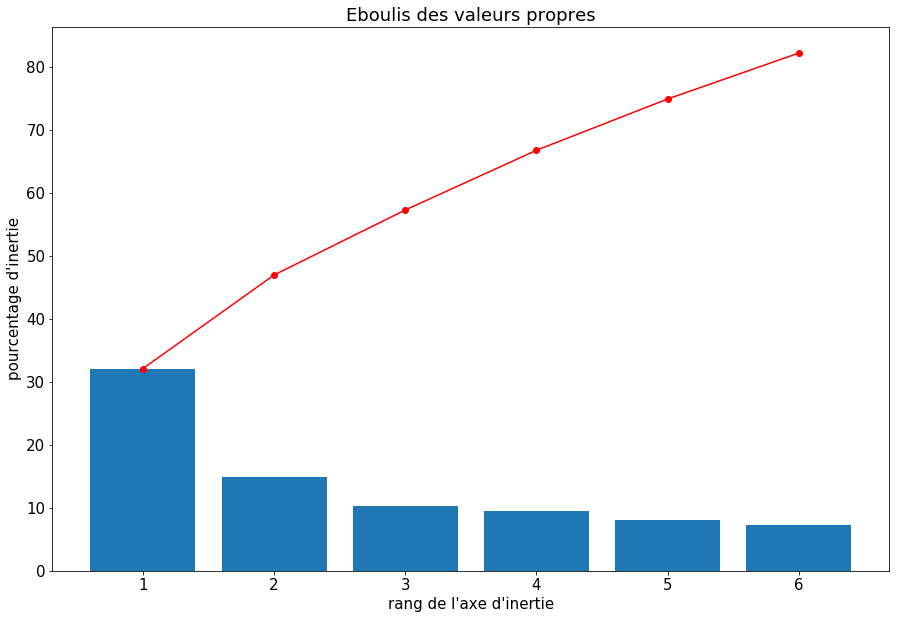

In [263]:
# from sklearn import preprocessing

n_comp = 6   # Nombre de composantes à calculer : F1,F2,F3,F4,F5,F6

# La normalisation a été faite avant l'ACP
# std_scale = preprocessing.StandardScaler().fit(X)
# X_scaled = std_scale.transform(X)

# Préparation des données pour l'ACP
X = part_clients.values                   # conversion en numpy.ndarray => suppression du nom de colonne et ligne
features = part_clients.columns

# Calcul des 'n_comp' premières composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X) 
coord = pca.fit_transform(X)            # retourne les coordonnées factorielles

# pourcentage de variance expliquée par chacune des composantes (axes factoriels) :
print("% de variance associées aux axes factoriels F1, F2, F3, F4, F5, F6 :\n", pca.explained_variance_ratio_)

print("Variance cumulée =", pca.explained_variance_ratio_.sum())  # Variance expliquée cumulée

# --- Eboulis des valeurs propres :  - Pourcentage d’inertie totale associé à chaque axe (en bleu)
#                                    - Somme cumulée des inerties                        (en rouge)
display_scree_plot(pca)


## Projection des variables : Cercle des corrélations

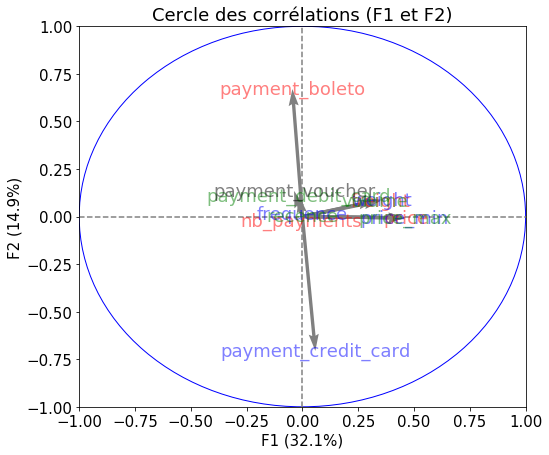

Combinaison linéaire des variables :
 ['price', 'price_min', 'price_max', 'freight', 'weight', 'volume', 'nb_payments', 'frequence', 'recence', 'payment_boleto', 'payment_credit_card', 'payment_debit_card', 'payment_voucher'] 

F1 = [ 4.61966780e-01  4.59632625e-01  4.60697719e-01  3.51298906e-01
  3.55532962e-01  3.25972338e-01 -3.54080276e-03 -5.52182447e-04
  9.29207302e-05 -4.49406564e-02  5.79805318e-02 -1.48541709e-02
 -3.73454306e-02]
F2 = [-0.00713782 -0.0073154  -0.00683033  0.08246193  0.08853728  0.08278288
 -0.02489349  0.01141246  0.00173856  0.67003414 -0.70615273  0.10865851
  0.1349074 ]




In [264]:
pcs = pca.components_

# 1er plan factoriel
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features), plan=1)

# Combinaisons linéaires des variables ->  
print("Combinaison linéaire des variables :\n", list_var,"\n")
F1 = pca.components_[0]; print("F1 =",F1)
F2 = pca.components_[1]; print("F2 =",F2)
print("\n")
  

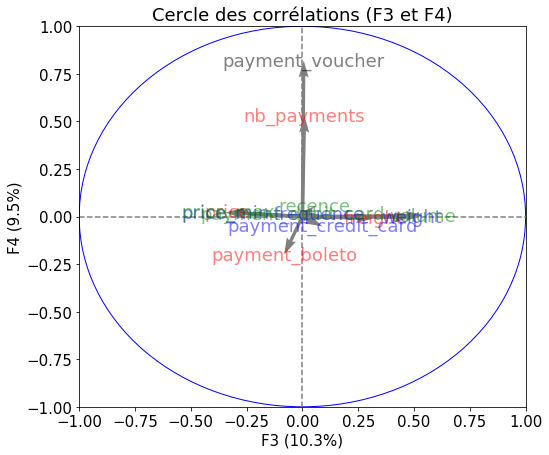

Combinaison linéaire des variables :
 ['price', 'price_min', 'price_max', 'freight', 'weight', 'volume', 'nb_payments', 'frequence', 'recence', 'payment_boleto', 'payment_credit_card', 'payment_debit_card', 'payment_voucher'] 

F3 = [-0.34012558 -0.34396429 -0.33500837  0.3163349   0.48859367  0.53845002
  0.00949864  0.07562671  0.05204674 -0.08174949  0.08969935 -0.04205259
  0.00606083]
F4 = [ 0.02191327  0.02119262  0.02229171 -0.01020448 -0.00421115  0.00496218
  0.52983158  0.01138034  0.0528685  -0.20021167 -0.0516055   0.01252648
  0.81968068]


In [265]:
# 2ème plan factoriel
display_circles(pcs, n_comp, pca, [(2,3)], labels = np.array(features), plan=2)

# Le 2ème plan factoriel (F3+F4) représente 20% de l'inertie totale
print("Combinaison linéaire des variables :\n", list_var,"\n")
F3 = pca.components_[2]; print("F3 =",F3)
F4 = pca.components_[3]; print("F4 =",F4)


## Classification hiérarchique ascendante



Temps estimé :  155 secondes



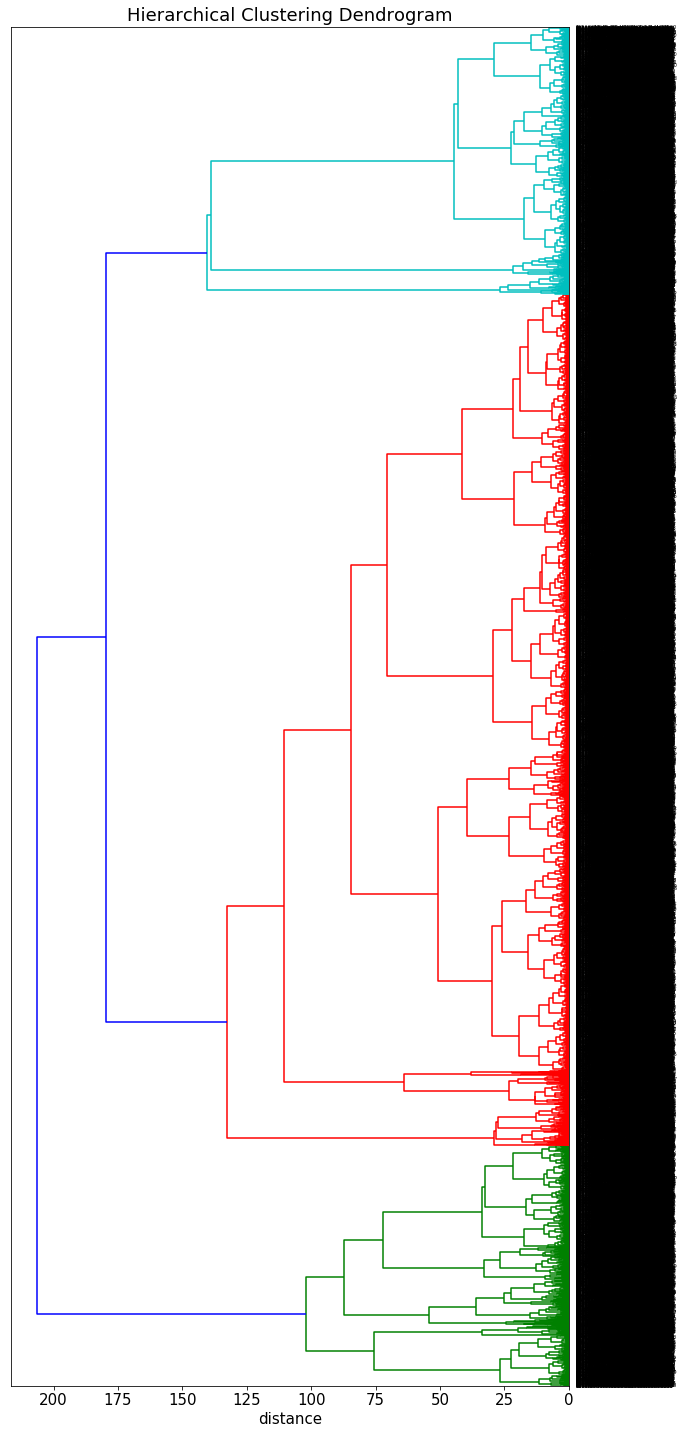

In [266]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram, linkage

print("\n\nTemps estimé :  155 secondes\n")

X = part_clients.values

# Centrage & Réduction ->  Déjà fait.
# std_scale = preprocessing.StandardScaler().fit(X)
# X_scaled = std_scale.transform(X)

# Clustering hiérarchique avec la méthode de Ward pour diminuer l'inertie intraclasse
Z = linkage(X, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, customers.unique())

# Le dendrogramme « suggère » un découpage en 6 ou 7 groupes.  On note qu’une classe de clients, (tout en bas), 
# se démarque fortement des autres au point qu’on aurait pu envisager aussi un découpage en 2 groupes seulement. 


### Variation du seuil de découpage

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26}   <- clusters pour une seuil de  30
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22}   <- clusters pour une seuil de  35
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}   <- clusters pour une seuil de  40
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}   <- clusters pour une seuil de  45
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}   <- clusters pour une seuil de  50
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}   <- clusters pour une seuil de  55
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}   <- clusters pour une seuil de  60
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}   <- clusters pour une seuil de  65
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}   <- clusters pour une seuil de  70
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}   <- clusters pour une seuil de  75
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}   <- clusters pour une seuil de 

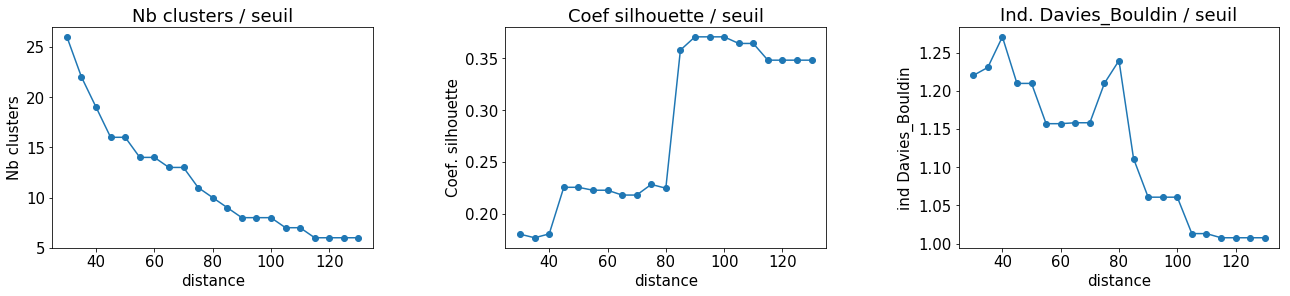

In [267]:
# Variation du seuil de découpage => Variation du nombre de clusters

from sklearn.metrics import davies_bouldin_score 
from sklearn import cluster, metrics


seuils = [30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130]
nb_clusters = []
silhouettes = []
davies = []

for seuil in seuils:                                           # découpage à la hauteur de 'seuil'
    
    groupes_cah = fcluster(Z, t=seuil, criterion='distance')   # clusters obtenus
    
    set_clusters = set(groupes_cah.tolist()); print(set_clusters,"  <- clusters pour une seuil de ",  seuil)
    nb_clusters.append(len(set_clusters))
    
    silh = metrics.silhouette_score(X, groupes_cah)
    silhouettes.append(silh)
    
    davie  = davies_bouldin_score(X, groupes_cah)
    davies.append(davie)
    

print("\nVariables choisies :\n", list_var,"\n")
    
    
fig = plt.figure(figsize=(20, 6))

ax = fig.add_subplot(131)
ax.set_title("Nb clusters / seuil")
ax.set_xlabel('distance')
ax.set_ylabel('Nb clusters')  
plt.plot(seuils, nb_clusters, marker='o')

ax = fig.add_subplot(132)
ax.set_title("Coef silhouette / seuil")
ax.set_xlabel('distance')
ax.set_ylabel('Coef. silhouette')     
plt.plot(seuils, silhouettes, marker='o')

ax = fig.add_subplot(133)
ax.set_title("Ind. Davies_Bouldin / seuil")
ax.set_xlabel('distance')
ax.set_ylabel('ind Davies_Bouldin')     
plt.plot(seuils, davies, marker='o')

plt.tight_layout(pad=5.0, w_pad=4.0, h_pad=4.0)   # marges
plt.savefig( "metrics_cah.png", dpi=50 )
plt.show()

# le coefficient de silhouette s(x) permet d'évaluer si ce point appartient au bon cluster 

# Choix du nombre de clusters = 6


### Decoupage du Dendrogramme

In [236]:
x = 6   # Decoupage du dendrogramme en 'x' clusters

clusters = fcluster(Z, x, criterion='maxclust')   # (Option : criterion='distance')

clusters   # -->  numéro de cluster attribué à chaque client
             


array([3, 3, 3, ..., 1, 3, 3], dtype=int32)

In [237]:
set(clusters)   # le 1er cluster est le '1'

{1, 2, 3, 4, 5, 6}

In [238]:
# Affichage du nombre de Clients pour chaque cluster

# Dataframe associant le Client au cluster :
clientCluster = pd.DataFrame({"Client": customers, "cluster": clusters})   # Client - cluster
print(clientCluster.head(5), "\n")

# Dataframe du nombre de clients par cluster :
clientCluster['Client'] = 1
cumul_cah = clientCluster.groupby(['cluster']).sum().reset_index()
cumul_cah.columns = ['cluster', 'nb_clients']   # Renommage colonnes
print(cumul_cah)

# cumul_cah.to_csv("C:/Users/loic/Documents/Formation/Data Scientist/Projet_5/cumul_cah.csv", index=False, header=True, sep=';')


                             Client  cluster
0  0000366f3b9a7992bf8c76cfdf3221e2        3
1  0000b849f77a49e4a4ce2b2a4ca5be3f        3
2  0000f46a3911fa3c0805444483337064        3
3  0000f6ccb0745a6a4b88665a16c9f078        3
4  0004aac84e0df4da2b147fca70cf8255        1 

   cluster  nb_clients
0        1        1772
1        2         297
2        3        5962
3        4         150
4        5         148
5        6        1671


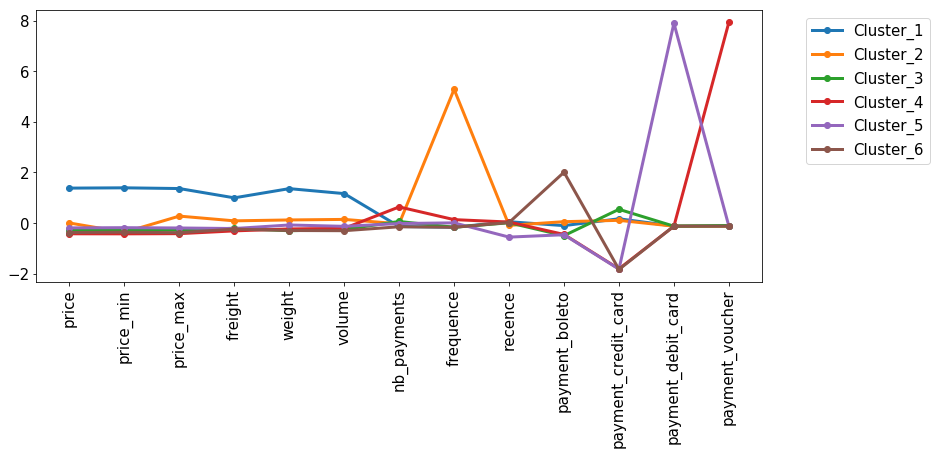

In [243]:
# 1. Dataframe associant chaque client à son cluster :   

part_clients['cluster'] = clusters

# Répartition des clients selon leur cluster :
client1 = part_clients.loc[part_clients.cluster == 1]; client1 = client1.drop(['cluster'], 1); c1 = client1.mean()
client2 = part_clients.loc[part_clients.cluster == 2]; client2 = client2.drop(['cluster'], 1); c2 = client2.mean()
client3 = part_clients.loc[part_clients.cluster == 3]; client3 = client3.drop(['cluster'], 1); c3 = client3.mean()
client4 = part_clients.loc[part_clients.cluster == 4]; client4 = client4.drop(['cluster'], 1); c4 = client4.mean()
client5 = part_clients.loc[part_clients.cluster == 5]; client5 = client5.drop(['cluster'], 1); c5 = client5.mean()
client6 = part_clients.loc[part_clients.cluster == 6]; client6 = client6.drop(['cluster'], 1); c6 = client6.mean()
client7 = part_clients.loc[part_clients.cluster == 7]; client7 = client7.drop(['cluster'], 1); c7 = client7.mean()
client8 = part_clients.loc[part_clients.cluster == 8]; client8 = client8.drop(['cluster'], 1); c8 = client8.mean()
client9 = part_clients.loc[part_clients.cluster == 9]; client9 = client9.drop(['cluster'], 1); c9 = client9.mean()

# print(pd.DataFrame.from_dict({'Cluster1': c1, 'Cluster2': c2, 'Cluster3': c3, 'Cluster4': c4, 'Cluster5': c5,
#                               'Cluster6': c6, 'Cluster7': c7, 'Cluster8': c8, 'Cluster9': c9},   orient = 'index'))

fig = plt.figure(figsize=(13, 5))

if len(client1) > 0:
    plt.plot(list_var, c1, "o-", label="Cluster_1", linewidth=3)
if len(client2) > 0:
    plt.plot(list_var, c2, "o-", label="Cluster_2", linewidth=3)
if len(client3) > 0:
    plt.plot(list_var, c3, "o-", label="Cluster_3", linewidth=3)
if len(client4) > 0:
    plt.plot(list_var, c4, "o-", label="Cluster_4", linewidth=3)
if len(client5) > 0:
    plt.plot(list_var, c5, "o-", label="Cluster_5", linewidth=3)
if len(client6) > 0:
    plt.plot(list_var, c6, "o-", label="Cluster_6", linewidth=3)
if len(client7) > 0:
    plt.plot(list_var, c7, "o-", label="Cluster_7", linewidth=3)
if len(client8) > 0:
    plt.plot(list_var, c8, "o-", label="Cluster_8", linewidth=3)
if len(client9) > 0:
    plt.plot(list_var, c9, "o-", label="Cluster_9", linewidth=3)

# plt.legend(loc = 'best')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xticks(rotation = 'vertical')
plt.show()
# "o-" est plus visible que "o"


In [244]:
# Dataframe associant chaque Client (non transformé) à son cluster : 

part_clients2['cluster'] = clusters

# Scission des clusters
client1 = part_clients2.loc[part_clients2.cluster == 1]; client1 = client1.drop(['cluster'], 1); c1 = client1.mean().round(2)
client2 = part_clients2.loc[part_clients2.cluster == 2]; client2 = client2.drop(['cluster'], 1); c2 = client2.mean().round(2)
client3 = part_clients2.loc[part_clients2.cluster == 3]; client3 = client3.drop(['cluster'], 1); c3 = client3.mean().round(2)
client4 = part_clients2.loc[part_clients2.cluster == 4]; client4 = client4.drop(['cluster'], 1); c4 = client4.mean().round(2)
client5 = part_clients2.loc[part_clients2.cluster == 5]; client5 = client5.drop(['cluster'], 1); c5 = client5.mean().round(2)
client6 = part_clients2.loc[part_clients2.cluster == 6]; client6 = client6.drop(['cluster'], 1); c6 = client6.mean().round(2)
client7 = part_clients2.loc[part_clients2.cluster == 7]; client7 = client7.drop(['cluster'], 1); c7 = client7.mean().round(2)
client8 = part_clients2.loc[part_clients2.cluster == 8]; client8 = client8.drop(['cluster'], 1); c8 = client8.mean().round(2)
client9 = part_clients2.loc[part_clients2.cluster == 9]; client9 = client9.drop(['cluster'], 1); c9 = client9.mean().round(2)

moy = pd.DataFrame.from_dict({'Cluster1': c1, 'Cluster2': c2, 'Cluster3': c3, 'Cluster4': c4, 'Cluster5': c5,
                              'Cluster6': c6, 'Cluster7': c7, 'Cluster8': c8, 'Cluster9': c9}, 
                             orient = 'index')
moy

# Sauvegarde du dataframe non transformé :
# moy.to_csv("C:/Users/loic/Documents/Formation/Data Scientist/Projet_5/cah_cluster.csv", index=False, header=True, sep=';')




Temps estimé :  50 secondes

(10000, 2)


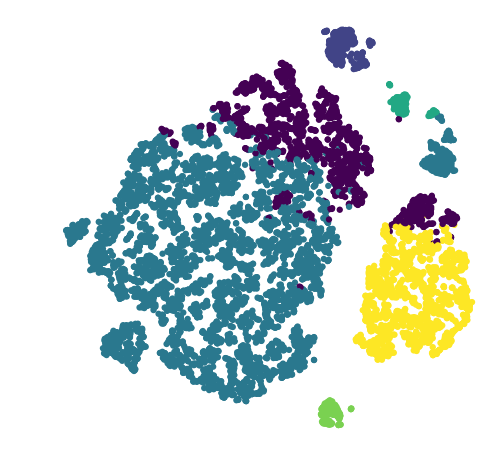

In [241]:
from sklearn.manifold import TSNE

def fashion_scatter(x):

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=clusters)   # une couleur/cluster
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    plt.show()

print("\n\nTemps estimé :  50 secondes\n")

tsne = TSNE(n_components=2)
X_2d = tsne.fit_transform(X)
print(X_2d.shape)
fashion_scatter(X_2d)


## Classifier selon K-means

### Etape préalable >  détermination du nombre optimal de clusters pour KMEANS

In [91]:
from sklearn.metrics import silhouette_score
from multiprocessing.dummy import Pool
from sklearn.cluster import KMeans
import functools


print("\n\nTemps estimé :  147 secondes\n")

X = part_clients.values

kmeans = KMeans(init='k-means++')

# define your custom function for passing into each thread
def find_cluster(n_clusters, kmeans, X):
       kmeans.set_params(n_clusters=n_clusters)  # set n_cluster
       labels = kmeans.fit_predict(X)            # fit & predict
       score = silhouette_score(X, labels)       # get the score
       return score

index_best = []
clusters = [5, 6, 7, 8]

for i in range(0,20):
    pool = Pool()                                                                     # parallel implementation
    results = pool.map(functools.partial(find_cluster, kmeans=kmeans, X=X), clusters)
    pool.close()
    pool.join()

    print(results)   # scores associé à chaque nombre de clusters
    #print(max(results))
    #print(results.index(max(results)))
    index_best.append(results.index(max(results)))    # ajout de l'index du meilleur score

moy_index = mean(index_best)
print("Meilleur nombre de clusters :", clusters[int(moy_index)])

# Meilleur nombre de clusters : 6
    



Temps estimé :  147 secondes

[0.2373407319449513, 0.2780404960669733, 0.27779395947915264, 0.2780404960669733]
[0.2811112131399136, 0.2811112131399136, 0.27994158708927286, 0.2780404960669733]
[0.2811112131399136, 0.2811112131399136, 0.2780404960669733, 0.31040477038813424]
[0.2780404960669733, 0.27826601718405314, 0.27832469471454085, 0.2811112131399136]
[0.2783607085856162, 0.27831364448468887, 0.2780404960669733, 0.2781979308478891]
[0.2809269463183091, 0.2811112131399136, 0.2801714141154879, 0.27779395947915264]
[0.2780404960669733, 0.2801714141154879, 0.2780404960669733, 0.2780404960669733]
[0.2780404960669733, 0.2780404960669733, 0.2780404960669733, 0.2780404960669733]
[0.2780404960669733, 0.2780404960669733, 0.2780404960669733, 0.2780404960669733]
[0.2780404960669733, 0.27779395947915264, 0.2780404960669733, 0.2780404960669733]
[0.2780404960669733, 0.2780404960669733, 0.28110432350191217, 0.280573409337362]
[0.2780404960669733, 0.2780404960669733, 0.2780404960669733, 0.280491

Text(0,0.5,'Cout du modele (inertia)')

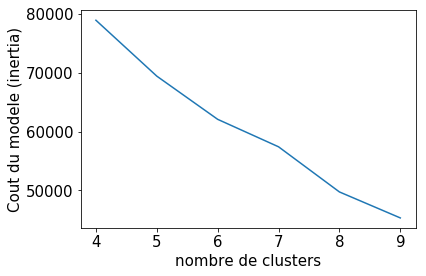

In [90]:
# Pour trouver le bon nombre de clusters :  "Elbow Method" : détecte une zone de 'coude' dans la minimisation du coût(inertia_)
# Cette zone de coude nous indique le nombre de clusters optimale c'est à dire celui qui nous permet de réduire au maximum le
#   coût de notre modèle tout en conservant un nombre raisonnable de clusters.


X = part_clients.values

inertia = []               # coût de nos différents modeles pour des valeurs de k allant de 1 à 20
K_range = range(4, 10)
for k in K_range:
    model = KMeans(n_clusters=k, init='k-means++')
    model.fit(X)       # entrainement du model
    inertia.append(model.inertia_)
    
plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (inertia)')


### Clustering K-means avec variation du nombre de clusters

In [271]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pi', 'sqrt', 'ldexp', 'tanh', 'pylab', 'e', 'hypot', 'log1p', 'radians', 'trunc', 'copysign', 'log2', 'exp', 'cos', 'nan', 'mean', 'inf', 'isinf', 'sin', 'gamma', 'degrees', 'log10', 'floor', 'modf', 'ceil', 'sinh', 'gcd', 'random', 'cosh', 'expm1', 'isclose', 'fabs', 'fmod', 'isnan', 'tan', 'log', 'remainder', 'isfinite', 'frexp']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


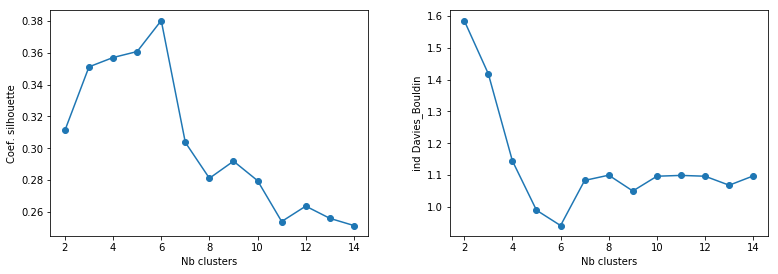

In [273]:
# Variation du nombre de clusters

from sklearn.metrics import davies_bouldin_score 
from sklearn import cluster, metrics

X = part_clients.values

nb_clusters = []
silhouettes = []
davies = []

for num_clusters in range(2, 15):
    
    cls = cluster.KMeans(n_clusters=num_clusters, n_init=10, init='k-means++')   # init='k-means++' ou 'random'
    cls.fit(X)
    
    silh = metrics.silhouette_score(X, cls.labels_)
    silhouettes.append(silh)
    davie  = davies_bouldin_score(X, cls.labels_)
    davies.append(davie)
    
# n_init=1         :  une seule initialisation suivie d’une seule exécution de K-means
# init='k-means++' :  méthode d’initialisation k-means++

fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121)
ax.set_xlabel('Nb clusters')
ax.set_ylabel('Coef. silhouette')     
plt.plot(range(2, 15), silhouettes, marker='o')

ax = fig.add_subplot(122)
ax.set_xlabel('Nb clusters')
ax.set_ylabel('ind Davies_Bouldin')     
plt.plot(range(2, 15), davies, marker='o')

plt.tight_layout(pad=5.0, w_pad=4.0, h_pad=4.0)   # marges
plt.savefig( "metrics_km.png", dpi=50 )
plt.show()


# le coefficient de silhouette s(x) permet d'évaluer si ce point appartient au bon cluster 
#
# L'idée de l'indice de Davies-Bouldin est de comparer les distance intra-cluster (c'est l'homogénéité), 
#    que l'on veut faibles, aux distances inter-cluster (la séparation), que l'on veut grandes.
# Il est donc compris entre -1 et 1, et d'autant plus proche de 1 que l'assignation de x à son cluster est satisfaisante.
#
# Choix du nombre de clusters = 6,7,8,9


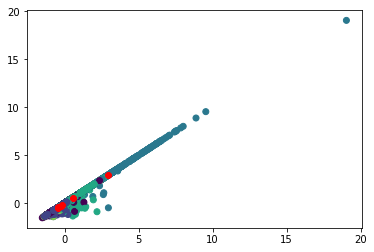

In [274]:
#  Cluster selon K-means

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition

# Nombre de clusters souhaités
n_clust = 6

X = part_clients.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
# X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_
pred = km.predict(X)     #  <- Alternative pour obtenir les groupes prédits pour les données

# Visualisez les résultats de cette classification :
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X[:,0], X[:,1], X[:,2], c=pred)
# plt.show()

# Maintenant que les points ont leur cluster, on peut les afficher en identifiant leur cluster avec une couleur
plt.scatter(X[:, 0], X[:, 1], c=km.predict(X))
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='r')   # affichage des centroids
plt.show()


In [275]:
set(clusters)   # le 1er cluster est le '0'


{0, 1, 2, 3, 4, 5}

In [276]:
# Affichage du nombre de Clients pour chaque cluster

# Dataframe associant le Client au cluster :
clientCluster = pd.DataFrame({"Client": customers, "cluster": clusters})   # Client - cluster
print(clientCluster.head(5), "\n")

# Dataframe du nombre de clients par cluster :
clientCluster['Client'] = 1
cumul_km = clientCluster.groupby(['cluster']).sum().reset_index()
cumul_km.columns = ['cluster', 'nb_clients']   # Renommage colonnes
print(cumul_km)

# cumul_km.to_csv("C:/Users/loic/Documents/Formation/Data Scientist/Projet_5/cumul_km.csv", index=False, header=True, sep=';')


                             Client  cluster
0  0000366f3b9a7992bf8c76cfdf3221e2        1
1  0000b849f77a49e4a4ce2b2a4ca5be3f        1
2  0000f46a3911fa3c0805444483337064        1
3  0000f6ccb0745a6a4b88665a16c9f078        1
4  0004aac84e0df4da2b147fca70cf8255        3 

   cluster  nb_clients
0        0        1895
1        1        4681
2        2         509
3        3        2599
4        4         168
5        5         148


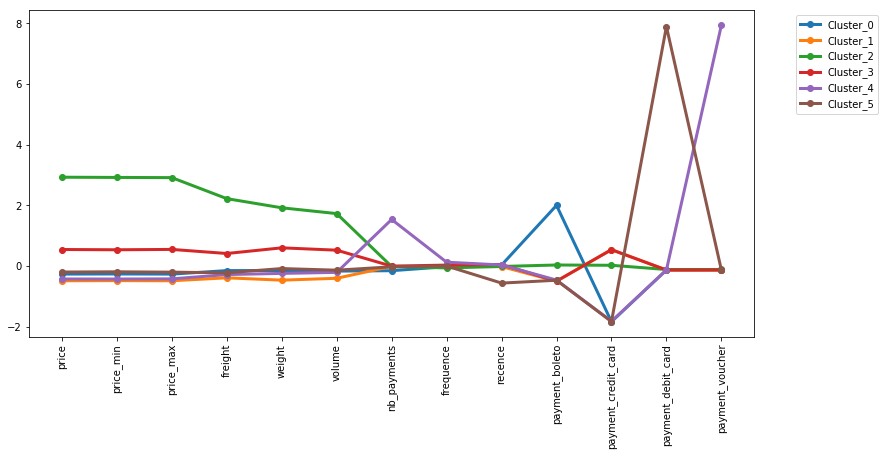

In [277]:
# 1. Dataframe associant chaque Client à son cluster :   

part_clients['cluster'] = clusters

# Répartition des clients selon leur cluster :
client0 = part_clients.loc[part_clients.cluster == 0]; client0 = client0.drop(['cluster'], 1); c0 = client0.mean()
client1 = part_clients.loc[part_clients.cluster == 1]; client1 = client1.drop(['cluster'], 1); c1 = client1.mean()
client2 = part_clients.loc[part_clients.cluster == 2]; client2 = client2.drop(['cluster'], 1); c2 = client2.mean()
client3 = part_clients.loc[part_clients.cluster == 3]; client3 = client3.drop(['cluster'], 1); c3 = client3.mean()
client4 = part_clients.loc[part_clients.cluster == 4]; client4 = client4.drop(['cluster'], 1); c4 = client4.mean()
client5 = part_clients.loc[part_clients.cluster == 5]; client5 = client5.drop(['cluster'], 1); c5 = client5.mean()
client6 = part_clients.loc[part_clients.cluster == 6]; client6 = client6.drop(['cluster'], 1); c6 = client6.mean()
client7 = part_clients.loc[part_clients.cluster == 7]; client7 = client7.drop(['cluster'], 1); c7 = client7.mean()
client8 = part_clients.loc[part_clients.cluster == 8]; client8 = client8.drop(['cluster'], 1); c8 = client8.mean()

# print(pd.DataFrame.from_dict({'Cluster0': c0, 'Cluster1': c1, 'Cluster2': c2, 'Cluster3': c3, 'Cluster4': c4, 
#                               'Cluster5': c5, 'Cluster6': c6, 'Cluster7': c7, 'Cluster8': c8},           orient = 'index'))

fig = plt.figure(figsize=(13, 6))
if len(client0) > 0:
    plt.plot(list_var, c0, "o-", label="Cluster_0", linewidth=3)
if len(client1) > 0:
    plt.plot(list_var, c1, "o-", label="Cluster_1", linewidth=3)
if len(client2) > 0:
    plt.plot(list_var, c2, "o-", label="Cluster_2", linewidth=3)
if len(client3) > 0:
    plt.plot(list_var, c3, "o-", label="Cluster_3", linewidth=3)
if len(client4) > 0:
    plt.plot(list_var, c4, "o-", label="Cluster_4", linewidth=3)
if len(client5) > 0:
    plt.plot(list_var, c5, "o-", label="Cluster_5", linewidth=3)
if len(client6) > 0:
    plt.plot(list_var, c6, "o-", label="Cluster_6", linewidth=3)
if len(client7) > 0:
    plt.plot(list_var, c7, "o-", label="Cluster_7", linewidth=3)
if len(client8) > 0:
    plt.plot(list_var, c8, "o-", label="Cluster_8", linewidth=3)

# plt.legend(loc = 'best')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xticks(rotation = 'vertical')
plt.savefig( "grap_kmeans_cluster.png", dpi=80 )
plt.show()


In [278]:
# Dataframe associant chaque Client (non transformé) à son cluster : 

part_clients2['cluster'] = clusters

# Scission des clusters :
client0 = part_clients2.loc[part_clients2.cluster == 0]; client0 = client0.drop(['cluster'], 1); c0 = client0.mean().round(2)
client1 = part_clients2.loc[part_clients2.cluster == 1]; client1 = client1.drop(['cluster'], 1); c1 = client1.mean().round(2)
client2 = part_clients2.loc[part_clients2.cluster == 2]; client2 = client2.drop(['cluster'], 1); c2 = client2.mean().round(2)
client3 = part_clients2.loc[part_clients2.cluster == 3]; client3 = client3.drop(['cluster'], 1); c3 = client3.mean().round(2)
client4 = part_clients2.loc[part_clients2.cluster == 4]; client4 = client4.drop(['cluster'], 1); c4 = client4.mean().round(2)
client5 = part_clients2.loc[part_clients2.cluster == 5]; client5 = client5.drop(['cluster'], 1); c5 = client5.mean().round(2)
client6 = part_clients2.loc[part_clients2.cluster == 6]; client6 = client6.drop(['cluster'], 1); c6 = client6.mean().round(2)
client7 = part_clients2.loc[part_clients2.cluster == 7]; client7 = client7.drop(['cluster'], 1); c7 = client7.mean().round(2)
client8 = part_clients2.loc[part_clients2.cluster == 8]; client8 = client8.drop(['cluster'], 1); c8 = client8.mean().round(2)


moy = pd.DataFrame.from_dict({'Cluster0': c0, 'Cluster1': c1, 'Cluster2': c2, 'Cluster3': c3, 'Cluster4': c4, 
                              'Cluster5': c5, 'Cluster6': c6, 'Cluster7': c7, 'Cluster8': c8},    orient = 'index')
moy

# moy.to_csv("C:/Users/loic/Documents/Formation/Data Scientist/Projet_5/kmeans_cluster.csv", index=False, header=True, sep=';')




Temps estimé :  47 secondes



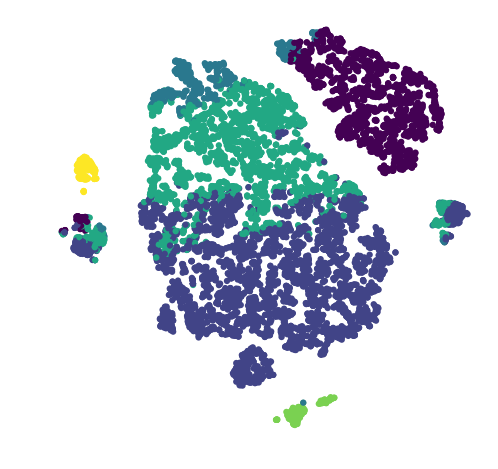

In [279]:
# Projection des clients avec t-SNE (t-Stochastic Neighbour Embedding)

from sklearn.manifold import TSNE

print("\n\nTemps estimé :  47 secondes\n")

def fashion_scatter(x):
    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=clusters)
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    plt.show()

# tsne = TSNE(n_components=2, perplexity=40, n_iter=3000, init='pca')     # 'perplexity' varie entre 5 et 50 en général
tsne = TSNE(n_components=2)
X_2d = tsne.fit_transform(X)
fashion_scatter(X_2d)


### Clustering avec DBSCAN  

### Etape préalable : détermination de l'hyper-paramètre EPSILON optimal

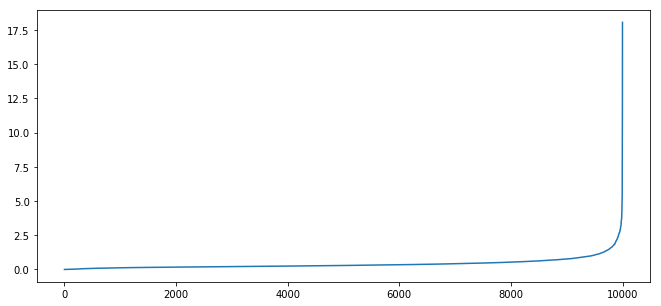

(array([[0.        , 0.37051016, 0.45771534, ..., 0.47811401, 0.48897464,
         0.49648223],
        [0.        , 0.2885672 , 0.31918821, ..., 0.35228922, 0.3674147 ,
         0.37192957],
        [0.        , 0.3995771 , 0.46010834, ..., 0.59086952, 0.61034963,
         0.62546187],
        ...,
        [0.        , 0.02769658, 0.0512941 , ..., 0.29312184, 0.30814733,
         0.31863233],
        [0.        , 0.10199382, 0.11046936, ..., 0.33928274, 0.35238723,
         0.36502189],
        [0.        , 0.3689021 , 0.49540488, ..., 0.53798289, 0.57466034,
         0.5840749 ]]), array([[   0, 7533, 1498, ..., 6522, 1552, 3527],
        [   1,  682, 2472, ..., 8661, 8071, 2316],
        [   2, 1261, 7366, ...,  622, 1113, 8779],
        ...,
        [9997, 4867, 9110, ..., 7722, 8130,  387],
        [9998, 1463,   26, ...,  938,  541, 7324],
        [9999, 9046,  873, ..., 8502, 2920, 4669]], dtype=int64))

In [98]:
%matplotlib inline
from sklearn.neighbors import NearestNeighbors

X = part_clients.values

fig = plt.figure(figsize=(11, 5))

neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.savefig( "epsilon_optimal.png", dpi=80 )
plt.show()

# Nous choisissons un ε de tel sorte que 90-95% des observations aient une distance au proche voisin inférieure à ε. 
# Dans notre cas, une valeur entre 2 et 5 semble convenir.


In [100]:
# Détermination du meilleur epsilon :  

from sklearn.cluster import DBSCAN

fig = plt.figure(figsize=(11, 5))

range_eps = [2,3,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4,5]
nb_clusters = []
coef_silhouette = []

for i in range_eps:
    db = DBSCAN(eps=i, min_samples=10).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    silhouette_avg = silhouette_score(X, labels)
    print("\neps="+str(i)," ", set(labels))
    print("Pour eps="+str(i), ", le Coef.Silhouette moyen =", silhouette_avg)
    
    nb_clusters.append(len(set(labels)) - 1)
    coef_silhouette.append(silhouette_avg)

# Meilleur Coef. Silhouette pour eps= 3.8 avec un nombre de cluster= 5
  


eps=2   {0, 1, 2, 3, 4, 5, 6, -1}
Pour eps=2 , le Coef.Silhouette moyen = 0.3587641943017665

eps=3   {0, 1, 2, 3, 4, 5, 6, -1}
Pour eps=3 , le Coef.Silhouette moyen = 0.36256912868801666

eps=3.1   {0, 1, 2, 3, 4, 5, 6, 7, -1}
Pour eps=3.1 , le Coef.Silhouette moyen = 0.3606510702819589

eps=3.2   {0, 1, 2, 3, 4, 5, 6, 7, -1}
Pour eps=3.2 , le Coef.Silhouette moyen = 0.360624782640605

eps=3.3   {0, 1, 2, 3, 4, 5, 6, 7, -1}
Pour eps=3.3 , le Coef.Silhouette moyen = 0.3607149226719831

eps=3.4   {0, 1, 2, 3, 4, 5, 6, 7, -1}
Pour eps=3.4 , le Coef.Silhouette moyen = 0.360057982451871

eps=3.5   {0, 1, 2, 3, 4, 5, 6, -1}
Pour eps=3.5 , le Coef.Silhouette moyen = 0.35174234957089984

eps=3.6   {0, 1, 2, 3, 4, 5, 6, -1}
Pour eps=3.6 , le Coef.Silhouette moyen = 0.35134361259992314

eps=3.7   {0, 1, 2, 3, 4, 5, 6, -1}
Pour eps=3.7 , le Coef.Silhouette moyen = 0.3514513529353434

eps=3.8   {0, 1, 2, 3, 4, -1}
Pour eps=3.8 , le Coef.Silhouette moyen = 0.41721069062566796

eps=3.9   {0, 1, 2,

<Figure size 792x360 with 0 Axes>

In [101]:
# Détermination du meilleur 'min_samples' :

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

min_samples = [5,6,7,8,9,10,15]

for i in min_samples:
    
    db = DBSCAN(eps=3.8, min_samples=i).fit(X)
    
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = set([label for label in db.labels_ if label >= 0])
    print(set(labels),"  Pour min_samples="+str(i), ",Total de clusters ", len(set(labels)))

# Il faut trouver le min_samples pour lequel le nombre de clusters= 5 => min_samples=8

# {0, 1, 2, 3, 4, 5, 6}   Pour min_samples=5 ,Total de clusters  7
# {0, 1, 2, 3, 4, 5}   Pour min_samples=6 ,Total de clusters  6
# {0, 1, 2, 3, 4, 5}   Pour min_samples=7 ,Total de clusters  6
# {0, 1, 2, 3, 4}   Pour min_samples=8 ,Total de clusters  5      <- OK
# {0, 1, 2, 3, 4}   Pour min_samples=9 ,Total de clusters  5
# {0, 1, 2, 3, 4}   Pour min_samples=10 ,Total de clusters  5
# {0, 1, 2, 3}   Pour min_samples=15 ,Total de clusters  4
# {0, 1, 2, 3}   Pour min_samples=20 ,Total de clusters  4


{0, 1, 2, 3, 4, 5, 6}   Pour min_samples=5 ,Total de clusters  7
{0, 1, 2, 3, 4, 5}   Pour min_samples=6 ,Total de clusters  6
{0, 1, 2, 3, 4, 5}   Pour min_samples=7 ,Total de clusters  6
{0, 1, 2, 3, 4}   Pour min_samples=8 ,Total de clusters  5
{0, 1, 2, 3, 4}   Pour min_samples=9 ,Total de clusters  5
{0, 1, 2, 3, 4}   Pour min_samples=10 ,Total de clusters  5
{0, 1, 2, 3}   Pour min_samples=15 ,Total de clusters  4
{0, 1, 2, 3}   Pour min_samples=20 ,Total de clusters  4


In [103]:
from sklearn import cluster, metrics
from sklearn.cluster import DBSCAN


X = part_clients.values

db = DBSCAN(eps=3.8, min_samples=8)
# print(db)
db.fit(X)

y_pred = db.fit_predict(X)


print(db.labels_)    #  pour chaque element du dataset :  cluster associé. Si “-1” sont considérer comme du bruit.
print("Buit ou Outliers =", db.labels_[db.labels_ == -1].size)

# indices des element qui sont considérer comme noyaux. c’est à dire les point qui ont au moins 10 (min_samples) voisins 
#   qui sont à une distance inférieure ou egale à 0.3 (eps).
print(db.core_sample_indices_)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
clusters = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

# set(db.labels_)   # {-1, 0, 1, 2, 3, 4}

# db = DBSCAN(eps=3.8, min_samples=8)
# Estimated number of clusters: 5
# Estimated number of noise points: 49
# Silhouette Coefficient: 0.444


[0 0 0 ... 0 0 0]
Buit ou Outliers = 49
[   0    1    2 ... 9997 9998 9999]
Estimated number of clusters: 5
Estimated number of noise points: 49
Silhouette Coefficient: 0.418


In [104]:
# Affichage du nombre de Clients pour chaque cluster

# Dataframe associant le Client au cluster :
clientCluster = pd.DataFrame({"Client": customers, "cluster": clusters})   # Client - cluster
print(clientCluster.head(5), "\n")

# Dataframe du nombre de clients par cluster :
clientCluster['Client'] = 1
cumul_dbscan = clientCluster.groupby(['cluster']).sum().reset_index()
cumul_dbscan.columns = ['cluster', 'nb_clients']   # Renommage colonnes
print(cumul_dbscan)

# cumul_dbscan.to_csv("C:/Users/loic/Documents/Formation/Data Scientist/Projet_5/cumul_db.csv", index=False, header=True, sep=';')


                             Client  cluster
0  0000366f3b9a7992bf8c76cfdf3221e2        0
1  0000b849f77a49e4a4ce2b2a4ca5be3f        0
2  0000f46a3911fa3c0805444483337064        0
3  0000f6ccb0745a6a4b88665a16c9f078        0
4  0004aac84e0df4da2b147fca70cf8255        0 

   cluster  nb_clients
0       -1          49
1        0        9367
2        1         138
3        2         277
4        3         154
5        4          15


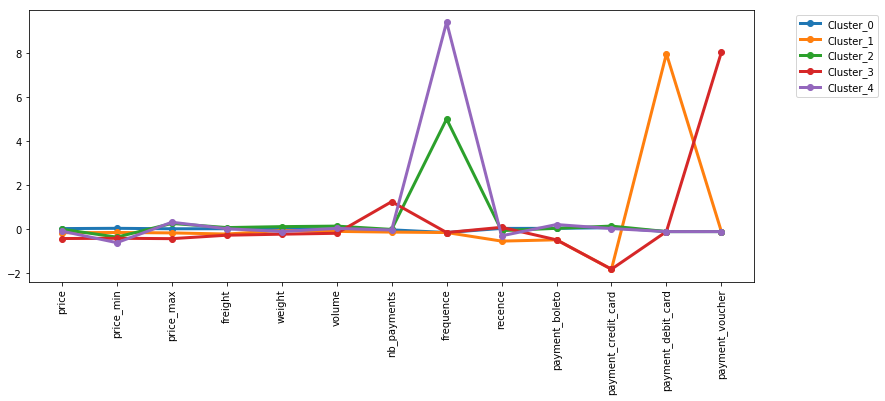

In [105]:
# 1. Dataframe associant chaque Client à son cluster :   

part_clients['cluster'] = clusters

# Répartition des clients selon leur cluster :
client0 = part_clients.loc[part_clients.cluster == 0]; client0 = client0.drop(['cluster'], 1); c0 = client0.mean()
client1 = part_clients.loc[part_clients.cluster == 1]; client1 = client1.drop(['cluster'], 1); c1 = client1.mean()
client2 = part_clients.loc[part_clients.cluster == 2]; client2 = client2.drop(['cluster'], 1); c2 = client2.mean()
client3 = part_clients.loc[part_clients.cluster == 3]; client3 = client3.drop(['cluster'], 1); c3 = client3.mean()
client4 = part_clients.loc[part_clients.cluster == 4]; client4 = client4.drop(['cluster'], 1); c4 = client4.mean()
client5 = part_clients.loc[part_clients.cluster == 5]; client5 = client5.drop(['cluster'], 1); c5 = client5.mean()
client6 = part_clients.loc[part_clients.cluster == 6]; client6 = client6.drop(['cluster'], 1); c6 = client6.mean()
client7 = part_clients.loc[part_clients.cluster == 7]; client7 = client7.drop(['cluster'], 1); c7 = client7.mean()
client8 = part_clients.loc[part_clients.cluster == 8]; client8 = client8.drop(['cluster'], 1); c8 = client8.mean()
client9 = part_clients.loc[part_clients.cluster == 9]; client9 = client9.drop(['cluster'], 1); c9 = client9.mean()

fig = plt.figure(figsize=(13, 5))
if len(client0) > 0:
    plt.plot(list_var, c0, "o-", label="Cluster_0", linewidth=3)
if len(client1) > 0:
    plt.plot(list_var, c1, "o-", label="Cluster_1", linewidth=3)
if len(client2) > 0:
    plt.plot(list_var, c2, "o-", label="Cluster_2", linewidth=3)
if len(client3) > 0:
    plt.plot(list_var, c3, "o-", label="Cluster_3", linewidth=3)
if len(client4) > 0:
    plt.plot(list_var, c4, "o-", label="Cluster_4", linewidth=3)
if len(client5) > 0:
    plt.plot(list_var, c5, "o-", label="Cluster_5", linewidth=3)
if len(client6) > 0:
    plt.plot(list_var, c6, "o-", label="Cluster_6", linewidth=3)
if len(client7) > 0:
    plt.plot(list_var, c7, "o-", label="Cluster_7", linewidth=3)
if len(client8) > 0:
    plt.plot(list_var, c8, "o-", label="Cluster_8", linewidth=3)
if len(client9) > 0:
    plt.plot(list_var, c9, "o-", label="Cluster_9", linewidth=3)


plt.legend(loc = 'best')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xticks(rotation = 'vertical')
plt.savefig( "grap_kmeans_cluster.png", dpi=80 )
plt.show()



In [109]:
# Dataframe associant chaque Client (non transformé) à son cluster : 

part_clients2['cluster'] = clusters

# Scission des clusters
client0 = part_clients2.loc[part_clients2.cluster == 0]; client0 = client0.drop(['cluster'], 1); c0 = client0.mean().round(2)
client1 = part_clients2.loc[part_clients2.cluster == 1]; client1 = client1.drop(['cluster'], 1); c1 = client1.mean().round(2)
client2 = part_clients2.loc[part_clients2.cluster == 2]; client2 = client2.drop(['cluster'], 1); c2 = client2.mean().round(2)
client3 = part_clients2.loc[part_clients2.cluster == 3]; client3 = client3.drop(['cluster'], 1); c3 = client3.mean().round(2)
client4 = part_clients2.loc[part_clients2.cluster == 4]; client4 = client4.drop(['cluster'], 1); c4 = client4.mean().round(2)
client5 = part_clients2.loc[part_clients2.cluster == 5]; client5 = client5.drop(['cluster'], 1); c5 = client5.mean().round(2)
client6 = part_clients2.loc[part_clients2.cluster == 6]; client6 = client6.drop(['cluster'], 1); c6 = client6.mean().round(2)
client7 = part_clients2.loc[part_clients2.cluster == 7]; client7 = client7.drop(['cluster'], 1); c7 = client7.mean().round(2)
client8 = part_clients2.loc[part_clients2.cluster == 8]; client8 = client8.drop(['cluster'], 1); c8 = client8.mean().round(2)
client9 = part_clients2.loc[part_clients2.cluster == 9]; client9 = client9.drop(['cluster'], 1); c9 = client9.mean().round(2)

moy = pd.DataFrame.from_dict({'Cluster0': c0, 'Cluster1': c1, 'Cluster2': c2, 'Cluster3': c3, 'Cluster4': c4, 
                              'Cluster5': c5, 'Cluster6': c6, 'Cluster7': c7, 'Cluster8': c8, 'Cluster9': c9}, 
                             orient = 'index')
moy

moy.to_csv("C:/Users/loic/Documents/Formation/Data Scientist/Projet_5/dbscan_cluster.csv", index=False, header=True, sep=';')




Temps estimé :  53 secondes



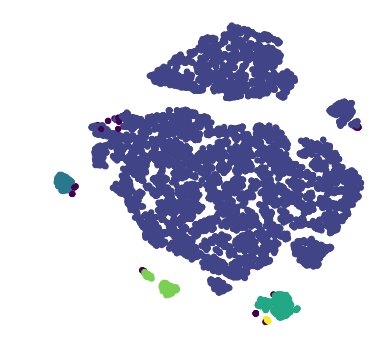

In [292]:
from sklearn.manifold import TSNE


print("\n\nTemps estimé :  53 secondes\n")

def fashion_scatter(x):

    # create a scatter plot.
    f = plt.figure(figsize=(6, 6))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=labels)
    ax.axis('off')
    ax.axis('tight')
    plt.show()

tsne = TSNE(n_components=2)
X_2d = tsne.fit_transform(X)
fashion_scatter(X_2d)

### Elimination des Outliers 

### DBSCAN sans outlier

In [293]:
# Elimination des outliers (db.labels_ == -1) et recommencer DBSCAN :

no_outliers = part_clients[part_clients['cluster'] != -1]
no_outliers = no_outliers.drop(['cluster'], 1)

no_outliers2 = part_clients2[part_clients2['cluster'] != -1]
no_outliers2 = no_outliers2.drop(['cluster'], 1)




Temps estimé :  61 secondes

Buit ou Outliers = 0
Estimated number of clusters: 5
Estimated number of noise points: 0


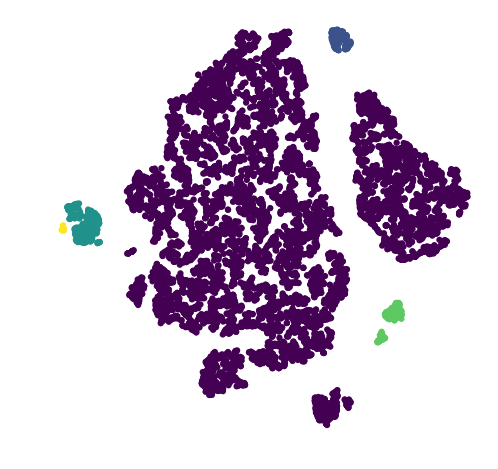

In [294]:
from sklearn.cluster import DBSCAN


print("\n\nTemps estimé :  61 secondes\n")

X = no_outliers.values

db = DBSCAN(eps=3.8, min_samples=8)
db.fit(X)

y_pred = db.fit_predict(X)

print("Buit ou Outliers =", db.labels_[db.labels_ == -1].size)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
clusters = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# ----- Affichage TSNE -----
def fashion_scatter(x):
    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=labels)
    ax.axis('off')
    ax.axis('tight')
    plt.show()

tsne = TSNE(n_components=2)
X_2d = tsne.fit_transform(X)
fashion_scatter(X_2d)


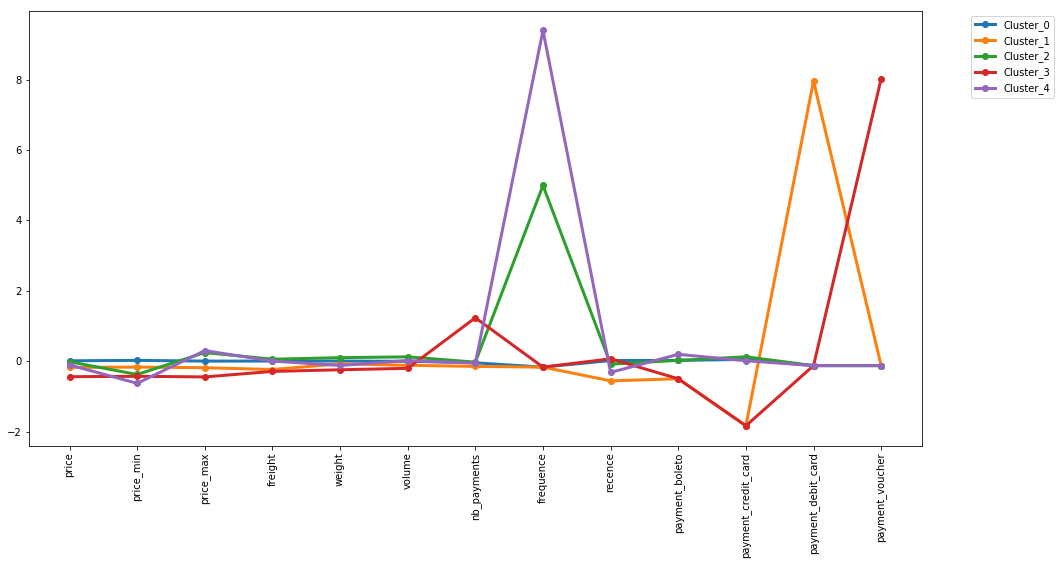

In [295]:
# 1. Dataframe associant chaque Client à son cluster :   

no_outliers['cluster'] = clusters

# Répartition des clients selon leur cluster :
client0 = no_outliers.loc[no_outliers.cluster == 0]; client0 = client0.drop(['cluster'], 1); c0 = client0.mean()
client1 = no_outliers.loc[no_outliers.cluster == 1]; client1 = client1.drop(['cluster'], 1); c1 = client1.mean()
client2 = no_outliers.loc[no_outliers.cluster == 2]; client2 = client2.drop(['cluster'], 1); c2 = client2.mean()
client3 = no_outliers.loc[no_outliers.cluster == 3]; client3 = client3.drop(['cluster'], 1); c3 = client3.mean()
client4 = no_outliers.loc[no_outliers.cluster == 4]; client4 = client4.drop(['cluster'], 1); c4 = client4.mean()
client5 = no_outliers.loc[no_outliers.cluster == 5]; client5 = client5.drop(['cluster'], 1); c5 = client5.mean()
client6 = no_outliers.loc[no_outliers.cluster == 6]; client6 = client6.drop(['cluster'], 1); c6 = client6.mean()

fig = plt.figure(figsize=(16, 8))
if len(client0) > 0:
    plt.plot(list_var, c0, "o-", label="Cluster_0", linewidth=3)
if len(client1) > 0:
    plt.plot(list_var, c1, "o-", label="Cluster_1", linewidth=3)
if len(client2) > 0:
    plt.plot(list_var, c2, "o-", label="Cluster_2", linewidth=3)
if len(client3) > 0:
    plt.plot(list_var, c3, "o-", label="Cluster_3", linewidth=3)
if len(client4) > 0:
    plt.plot(list_var, c4, "o-", label="Cluster_4", linewidth=3)
if len(client5) > 0:
    plt.plot(list_var, c5, "o-", label="Cluster_5", linewidth=3)
if len(client6) > 0:
    plt.plot(list_var, c6, "o-", label="Cluster_6", linewidth=3)


# plt.legend(loc = 'best')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xticks(rotation = 'vertical')
plt.savefig( "grap_kmeans_cluster.png", dpi=80 )
plt.show()


In [296]:
# Dataframe associant chaque Client (non transformé) à son cluster : 

no_outliers2['cluster'] = clusters

client0 = no_outliers2.loc[no_outliers2.cluster == 0]; client0 = client0.drop(['cluster'], 1); c0 = client1.mean()
client1 = no_outliers2.loc[no_outliers2.cluster == 1]; client1 = client1.drop(['cluster'], 1); c1 = client1.mean()
client2 = no_outliers2.loc[no_outliers2.cluster == 2]; client2 = client2.drop(['cluster'], 1); c2 = client2.mean()
client3 = no_outliers2.loc[no_outliers2.cluster == 3]; client3 = client3.drop(['cluster'], 1); c3 = client3.mean()
client4 = no_outliers2.loc[no_outliers2.cluster == 4]; client4 = client4.drop(['cluster'], 1); c4 = client4.mean()
client5 = no_outliers2.loc[no_outliers2.cluster == 5]; client5 = client5.drop(['cluster'], 1); c5 = client5.mean()
client6 = no_outliers2.loc[no_outliers2.cluster == 6]; client6 = client6.drop(['cluster'], 1); c6 = client6.mean()
client7 = no_outliers2.loc[no_outliers2.cluster == 7]; client7 = client7.drop(['cluster'], 1); c7 = client7.mean()
client8 = no_outliers2.loc[no_outliers2.cluster == 8]; client8 = client8.drop(['cluster'], 1); c8 = client8.mean()
client9 = no_outliers2.loc[no_outliers2.cluster == 9]; client9 = client9.drop(['cluster'], 1); c9 = client9.mean()

moy = pd.DataFrame.from_dict({'Cluster0': c0, 'Cluster1': c1, 'Cluster2': c2, 'Cluster3': c3, 'Cluster4': c4, 
                              'Cluster5': c5, 'Cluster6': c6, 'Cluster7': c7, 'Cluster8': c8, 'Cluster9': c9}, 
                             orient = 'index')
moy

# moy.to_csv("C:/Users/loic/Documents/Formation/Data Scientist/Projet_5/dbscan_neg_outlier.csv", index=False, header=True, sep=';')
